# Exploratory Data Analysis of Ocean Health Index (OHI) Database using Python

### A special project for MS 1
#### Leandro Ceasar A. Cediño

![](https://i.imgur.com/ZYyHfsx.jpg)

# Project Description

The scientific method is a testament to the importance of data in influencing scientific insights and in shaping models and theories. In an era wherein data is widely available and openly accessible, data science is one of the most important skills to learn for scientists today. For instance, data science in geology is beginning to trend as a flexible tool in various applications such as structural modelling and analysis, predicting geologic variation of coasts, and even mineral identification and prospection through artificial intelligence. Thus, undergraduate students of geology are enjoined to study data science in order to open doors for future innovations and discoveries.

Throughout my studies in MS 1, I have encountered several topics wherein data science was used for modelling and research. One particular example is using machine learning algorithms in predicting the future occurrences of red tides according to data from water temperature, salinity, pH, etc. as well as locations of previous red tide occurrences. In line with the theme Decade of the Oceans: the Science We Need for the Ocean We Want, for my special project in this course, I would like to integrate what I have learned in data science so far in contributing to the efforts of maintaining and improving the status of Philippine oceans through a fundamental data science step: an exploratory data analysis. 

Exploratory data analysis is done by scientists to familiarize themselves with the dataset/s through describing, cleaning, rearranging, sorting, and plotting the data as foundational steps before data modelling or machine learning. Through this process, first impressions of the data are indicated after observing particular trends and initial explanations are provided after some research and investigation, all of which are performed in preparation for more in-depth data science procedures. These insights are not meant to be final, instead, they are meant to be starting points from which one could begin before data modelling and then observing the effects of modelling in comparison to previously inferred observations.

In this special project, I will utilize the open-source data science framework named Ocean Health Index (OHI), managed by the University of California. The framework aims to monitor, record, and predict the overall wellness of the oceans in both local and global scales. The database consists of 220 different nations and coastal territories monitored using variables consisting of ten goals recorded annually across a one-decade timespan starting from 2012 up to 2021. My objective is to determine the status of the Philippine oceans in terms of the 10 OHI goals, and provide insights and explanations for the trends observed to help focus our efforts on appropriate aspects of conservation of the Philippine oceans.

*This project is hosted on Jupyter Notebook, a web-based interactive computing platform, through the Anaconda Python distribution platform. The project file (.ipynb) is converted to this viewable long-paged pdf format via HTML conversion using the nbconvert module. The project file itself, together with the code, can be viewed or downloaded at my [GitHub](https://github.com/lacedino/ms1-special-project/blob/main/ms1-special-project.ipynb).*

# Introduction

The Philippines hosts some of the richest marine resources in the world, ranging from highly diverse fish species, sprawling coral reefs, and magnificent beaches to untapped oil and gas reservoirs, mineral sources, and potential biotechnological products. However, the Philippine marine ecosystems are as delicate as they are wealthy, and are thus prone to environmental changes, which can include natural causes but are unfortunately driven by man-made activities at large, such as pollution, irresponsible fishing, habitat destruction, and much more. The effects of these activities could collectively result in global trends such as climate change, intensified red tides, ocean acidification, and other worrisome environmental effects. Thus, it is important to record changes in ocean aspects to effectively monitor the wellness of the oceans in both local and global scales.

The Ocean Health Index (OHI) is a global framework aiming to measure the status of the oceans in terms of ten goals across 220 different coastal nations and territories across the world. As a global effort to enhance our understanding of the oceans, the datasets and models of OHI are made available freely to the public for perusal, investigation, or research purposes. In this special exploratory data analysis project, I provide an overview of the status, trends, and comparisons of the ocean aspects of the Philippines as an individual nation and with respect to the world, and attempt to provide insights which could help explain these observations, using the OHI dataset for 2012 to 2021 and the Python programming language.

*Please note that as the primary step in data science, an exploratory data analysis only provides initial perspectives as a foundation for future operations with the data, and thus does not provide final explanations for the actual phenomena from which the data manifests.*

![](https://i.imgur.com/gYueqGV.jpg)

# Data Collection, Description, Segregation, and Cleaning

Let's start by importing some essential Python modules:
- [Numpy](https://numpy.org/doc/) will be used for computation and data storage.
- [Pandas](https://pandas.pydata.org/docs/) will be used for compiling the data.
- [Seaborn](https://seaborn.pydata.org/) and [Matplotlib](https://matplotlib.org/) will be used for data visualization.

We shall also import the `urlretrieve` function from the `urllib` module so that we could download the data from the OHI database.

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from urllib.request import urlretrieve

Let us also preset some data visualization parameters to make our tables, graphs, and charts look better later.

In [2]:
pd.options.display.max_columns = None
pd.options.display.max_colwidth = 3000
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

## Data Collection

The raw data for the results of the most recent OHI assessment are available at this [link](https://raw.githubusercontent.com/OHI-Science/ohi-global/draft/yearly_results/global2021/OHI_final_formatted_scores_2021-11-17.csv) and is arranged in a comma-separated values (csv) format. Let's download the data as a csv file using the `urlretrieve` function.

In [3]:
urlretrieve('https://raw.githubusercontent.com/OHI-Science/ohi-global/draft/yearly_results/global2021/OHI_final_formatted_scores_2021-11-17.csv', 'ohi.csv')

('ohi.csv', <http.client.HTTPMessage at 0x1d0a02f3488>)

We can now save the dataset as a dataframe and view the data using `pandas`.

In [4]:
ohi_df = pd.read_csv('ohi.csv')

In [5]:
ohi_df

,scenario,goal,long_goal,dimension,region_id,region_name,value
0,2012,AO,Artisanal opportunities,future,0,Global average,74.32
1,2012,AO,Artisanal opportunities,future,1,Cocos Islands,72.62
2,2012,AO,Artisanal opportunities,future,2,Christmas Island,72.62
3,2012,AO,Artisanal opportunities,future,3,Norfolk Island,41.41
4,2012,AO,Artisanal opportunities,future,4,Macquarie Island,NaN
...,...,...,...,...,...,...,...
243655,2021,TR,Tourism & recreation,trend,245,Bonaire,0.00
243656,2021,TR,Tourism & recreation,trend,247,Brunei,0.01
243657,2021,TR,Tourism & recreation,trend,248,Saba,0.00
243658,2021,TR,Tourism & recreation,trend,249,Sint Eustatius,0.00


The dataset contains 243 660 rows and 7 columns. Each row represents a region's calculated `goal`-specific `dimension` value during that year's assessment scenario.

## Data Description

We must investigate what each `goal` represents and what type of information each `dimension` captures. For this, we can refer to the [OHI methods documentation](http://htmlpreview.github.io/?https://github.com/OHI-Science/ohi-global/published/documents/methods/Supplement.html) and the [Global OHI score metadata](https://github.com/OHI-Science/ohi-global/blob/draft/yearly_results/README.md#global-ohi-score-metadata).

### Goals

The OHI database recognizes that ocean health is a function of both the ocean's impact towards the people, and the people's impact towards the oceans. These impacts are segregated into **10 goals**, four of which are further divided into 2 subgoals, summarized by the following table:

| Goal/subgoal | Full name | Description |
| ----------- | ----------- | ----------- |
| **AO** | **Artisanal Opportunities** | The opportunity for small-scale fishers to supply catch for their families, members of their local communities, or sell in local markets. |
| **BD** | **Biodiversity** | The conservation status of native marine species and key habitats that serve as a proxy for the suite of species that depend upon them. |
| SPP | Species (BD Subgoal) | The conservation status of native marine species. |
| HAB | Habitats (BD Subgoal) | The status of key habitats that serve as a proxy for the suite of species that depend upon them. |
| **CP** | **Coastal Protection** | The amount of protection provided by marine and coastal habitats serving as natural buffers against incoming waves. |
| **CS** | **Carbon storage** | The condition of coastal habitats that store and sequester atmospheric carbon. |
| **CW** | **Clean Waters** | The degree to which ocean regions are free of contaminants such as chemicals, eutrophication, harmful algal blooms, disease pathogens, and trash. |
| **LE** | **Livelihoods & Economies** | Coastal and ocean-dependent livelihoods (job quantity and quality) and economies (revenues) produced by marine sectors. |
| ECO | Economies (LE Subgoal) | Coastal and ocean-dependent economies (revenues) produced by marine sectors. |
| LIV | Livelihoods (LE Subgoal) | Coastal and ocean-dependent livelihoods (job quantity and quality) produced by marine sectors. |
| **FP** | **Food Provision** | The sustainable harvest of seafood from wild-caught fisheries and mariculture. |
| FIS | Wild-caught Fisheries (FP Subgoal) | The sustainable harvest of seafood from wild-caught fisheries. |
| MAR | Mariculture (FP Subgoal) | The sustainable harvest of seafood from mariculture practices. |
| **SP** | **Sense of Place** | The conservation status of iconic species (e.g., salmon, whales) and geographic locations that contribute to cultural identity. |
| ICO | Iconic Species (SP Subgoal) | The conservation status of iconic species (e.g., salmon, whales) that contribute to cultural identity. |
| LSP | Lasting Special Places score (SP Subgoal) | The conservation status of geographic locations that contribute to cultural identity. |
| **NP** | **Natural Products** | The natural resources that are sustainably extracted from living marine resources. |
| **TR** | **Tourism & Recreation** | The value people have for experiencing and enjoying coastal areas through activities such as sailing, recreational fishing, beach-going, and bird watching. |

*modified from Table 2.1 and Table 2.2 of [OHI methods documentation](http://htmlpreview.github.io/?https://github.com/OHI-Science/ohi-global/published/documents/methods/Supplement.html).*
 
It is useful to save the descriptions for each goal into a schema dataframe for future reference.

In [6]:
# Compile descriptions for each goal/subgoal

goal_desc_srs = pd.DataFrame(['The opportunity for small-scale fishers to supply catch for their families, members of their local communities, or sell in local markets.',
                'The conservation status of native marine species and key habitats that serve as a proxy for the suite of species that depend upon them.',
                'The amount of protection provided by marine and coastal habitats serving as natural buffers against incoming waves.',
                'The condition of coastal habitats that store and sequester atmospheric carbon.',
                'The degree to which ocean regions are free of contaminants such as chemicals, eutrophication, harmful algal blooms, disease pathogens, and trash.',
                'Coastal and ocean-dependent economies (revenues) produced by marine sectors.',
                'The sustainable harvest of seafood from wild-caught fisheries.',
                'The sustainable harvest of seafood from wild-caught fisheries and mariculture.',
                'The status of key habitats that serve as a proxy for the suite of species that depend upon them.',
                'The conservation status of iconic species (e.g., salmon, whales) that contribute to cultural identity.',
                'Index',
                'Coastal and ocean-dependent livelihoods (job quantity and quality) and economies (revenues) produced by marine sectors.',
                'Coastal and ocean-dependent livelihoods (job quantity and quality) produced by marine sectors.',
                'The conservation status of geographic locations that contribute to cultural identity.',
                'The sustainable harvest of seafood from mariculture practices.',
                'The natural resources that are sustainably extracted from living marine resources.',
                'The conservation status of iconic species (e.g., salmon, whales) and geographic locations that contribute to cultural identity.',
                'The conservation status of native marine species.',
                'The value people have for experiencing and enjoying coastal areas through activities such as sailing, recreational fishing, beach-going, and bird watching.'],
                            columns=['description'])

# Create dataframe of goal abbreviations and full names by merging together the respective columns from the main dataframe

goal_schema_df = pd.concat([ohi_df['goal'],ohi_df['long_goal']] , axis=1)

# Remove duplicate rows to recover each unique goal and subgoal

goal_schema_df.drop_duplicates(inplace=True)

# Reset indices for the sake of tidiness

goal_schema_df.reset_index(drop=True, inplace=True)

# Finalize by merging together the resulting dataframes

goal_schema_df = pd.concat([goal_schema_df,goal_desc_srs], axis=1)

pd.set_option('display.max_rows', None) # Shows all rows for display

goal_schema_df

,goal,long_goal,description
0,AO,Artisanal opportunities,"The opportunity for small-scale fishers to supply catch for their families, members of their local communities, or sell in local markets."
1,BD,Biodiversity,The conservation status of native marine species and key habitats that serve as a proxy for the suite of species that depend upon them.
2,CP,Coastal protection,The amount of protection provided by marine and coastal habitats serving as natural buffers against incoming waves.
3,CS,Carbon storage,The condition of coastal habitats that store and sequester atmospheric carbon.
4,CW,Clean water,"The degree to which ocean regions are free of contaminants such as chemicals, eutrophication, harmful algal blooms, disease pathogens, and trash."
5,ECO,Economies,Coastal and ocean-dependent economies (revenues) produced by marine sectors.
6,FIS,Fisheries (subgoal),The sustainable harvest of seafood from wild-caught fisheries.
7,FP,Food provision,The sustainable harvest of seafood from wild-caught fisheries and mariculture.
8,HAB,Habitat (subgoal),The status of key habitats that serve as a proxy for the suite of species that depend upon them.
9,ICO,Iconic species (subgoal),"The conservation status of iconic species (e.g., salmon, whales) that contribute to cultural identity."


In [7]:
pd.set_option('display.max_rows', 10) # Re-set to default row display setting

Notice that at row index 10, there is an extra goal named 'Index'. We need to investigate further to determine what this extra entry means.

### Dimensions

The OHI framework calculates the scores for each goal using four dimensions: current `status`, `resilience`, `pressure`, and `trend`, with each dimension calculated using multiple data points including chemical pollution, sea level rise, strength and weakness of governance, and others. The resilience, pressure, and trend dimensions are used to calculate the predicted `future` status, which is then averaged with the current status to calculate the final `score` for that goal during the year of that assessment scenario.

To summarize, the relationships between these variables are visualized by the figure below:

![](https://i.imgur.com/DnEDZWD.png)

*modified from Figure 2.1 of [OHI methods documentation](http://htmlpreview.github.io/?https://github.com/OHI-Science/ohi-global/published/documents/methods/Supplement.html).*



Descriptions for the role of each variable is summarized by the table below.

| Variable | Description |
| ----------- | ----------- |
| score | Final OHI score that takes into account current status and predicted future status. Values range from 0-100. |
| status | Current status of goal based on current state relative to reference state. Values range from 0-100. |
| future | Predicted future status (based on contributions of pressures, resilience, and trend). Values range from 0-100. |
| resilience | 	Variables such as good governance and ecological factors that provide resilience to pressures, and thus, are likely to improve future status. Values range from 0-100. |
| pressures | Pressures stress the system and threaten future delivery of benefits, and thus, are likely to reduce future status. Values range from 0-100. |
| trend | Average yearly change in status multiplied by 5 to esimate five years into the future. Units are proportional change and range from -1 to 1 |

*compiled and modified from Table 2.3 of [OHI methods documentation](http://htmlpreview.github.io/?https://github.com/OHI-Science/ohi-global/published/documents/methods/Supplement.html) and 'List of dimension and short description' table of [Global OHI score metadata](https://github.com/OHI-Science/ohi-global/blob/draft/yearly_results/README.md#global-ohi-score-metadata).*

The resulting current scores for each of the 10 goals in a specific year's assessment scenario is averaged to calculate the final `index` score for the region during that year — a single value that represents the overall ocean health of that region on a scale of 0-100. This explains the extra 'Index' goal observed earlier.

The `pressures` dimension is influenced by 23 factors, namely:

- Chemical pollution
- Coastal chemical pollution
- Pathogen pollution
- Nutrient pollution
- Coastal nutrient pollution
- Marine plastics
- Nonindigenous species
- Genetic escapes
- Subtidal soft bottom habitat destruction
- Subtidal hardbottom habitat destruction
- Intertidal habitat destruction
- Coral harvest pressure
- High bycatch due to commercial fishing
- Low bycatch due to commercial fishing
- Low bycatch due to artisanal fishing
- High bycatch due to artisanal fishing
- Targeted harvest of cetaceans and marine turtles
- Sea surface temperature
- Ocean acidification
- UV radiation
- Sea level rise
- Weakness of governance
- Weakness of social progress

Meanwhile, the `resilience` dimension is infulenced by 18 factors, namely:

- Measure of ecological integrity
- Measure of coastal ecological integrity
- Management of nonindigenous species
- CITES signatories
- Coastal protected marine areas (fishing preservation)
- EEZ protected marine areas (fishing preservation)
- Management of habitat to protect fisheries biodiversity	
- Fisheries management index
- Artisanal fisheries management effectiveness
- Management of habitat to protect habitat biodiversity
- Coastal protected marine areas (habitat preservation)	
- EEZ protected marine areas (habitat preservation)
- Management of tourism to preserve biodiversity
- Management of waters to preserve biodiversity
- Global Competitiveness Index (GCI)
- Economic diversity
- Strength of governance
- Social Progress Index

Each of these influencing factors contribute different weights depending on the goal. Unfortunately, we will not tackle the specific formulas and algorithms used to calculate the resulting values for each variable due to time, hardware, and computational constraints caused by the large size of the mother datasets and the sheer computational power required to process them. Thus, this exploratory analysis project is limited to the results of each year's assessment scenarios for each dimension and each goal, which is readily available using the OHI assessment results dataset previously downloaded.

Similar to what we did for the goals descriptions, it is useful to compile the dimension descriptions into a schema dataframe for future reference.

In [8]:
# Compile descriptions for each dimension

dimen_desc_srs = pd.DataFrame(['Predicted future status (based on contributions of pressures, resilience, and trend). Values range from 0-100.',
                               'Pressures stress the system and threaten future delivery of benefits, and thus, are likely to reduce future status. Values range from 0-100.',
                               'Variables such as good governance and ecological factors that provide resilience to pressures, and thus, are likely to improve future status. Values range from 0-100.',
                               'Final OHI score that takes into account current status and predicted future status. Values range from 0-100.',
                               'Current status of goal based on current state relative to reference state. Values range from 0-100.',
                               'Average yearly change in status multiplied by 5 to esimate five years into the future. Units are proportional change and range from -1 to 1'],
                               columns=['description'])

# Create dataframe of dimension names

dimen_schema_df = pd.DataFrame(np.sort(ohi_df['dimension'].unique()),
                              columns=['dimension'])

# Finalize by merging together the resulting dataframes

dimen_schema_df = pd.concat([dimen_schema_df,dimen_desc_srs], axis=1)
dimen_schema_df

,dimension,description
0,future,"Predicted future status (based on contributions of pressures, resilience, and trend). Values range from 0-100."
1,pressures,"Pressures stress the system and threaten future delivery of benefits, and thus, are likely to reduce future status. Values range from 0-100."
2,resilience,"Variables such as good governance and ecological factors that provide resilience to pressures, and thus, are likely to improve future status. Values range from 0-100."
3,score,Final OHI score that takes into account current status and predicted future status. Values range from 0-100.
4,status,Current status of goal based on current state relative to reference state. Values range from 0-100.
5,trend,Average yearly change in status multiplied by 5 to esimate five years into the future. Units are proportional change and range from -1 to 1


## Data Segregation

While the dataset contains information for 220 regions and territories, we will focus on data from the Philippines. Thus, it is beneficial to prepare a dataframe exclusive for the Philippines.

In [9]:
ohi_ph_df = ohi_df.loc[ohi_df['region_name'] == 'Philippines']
ohi_ph_df

,scenario,goal,long_goal,dimension,region_id,region_name,value
15,2012,AO,Artisanal opportunities,future,15,Philippines,87.16
236,2012,AO,Artisanal opportunities,pressures,15,Philippines,46.40
457,2012,AO,Artisanal opportunities,resilience,15,Philippines,60.35
679,2012,AO,Artisanal opportunities,score,15,Philippines,88.37
901,2012,AO,Artisanal opportunities,status,15,Philippines,89.59
...,...,...,...,...,...,...,...
242567,2021,TR,Tourism & recreation,pressures,15,Philippines,54.01
242788,2021,TR,Tourism & recreation,resilience,15,Philippines,77.40
243010,2021,TR,Tourism & recreation,score,15,Philippines,100.00
243232,2021,TR,Tourism & recreation,status,15,Philippines,100.00


We can also repeat the preparation for data on global averages, for future comparative analyses.

In [10]:
ohi_global_df = ohi_df.loc[ohi_df['region_name'] == 'Global average']
ohi_global_df

,scenario,goal,long_goal,dimension,region_id,region_name,value
0,2012,AO,Artisanal opportunities,future,0,Global average,74.32
664,2012,AO,Artisanal opportunities,score,0,Global average,75.09
886,2012,AO,Artisanal opportunities,status,0,Global average,75.86
1329,2012,BD,Biodiversity,future,0,Global average,80.74
1993,2012,BD,Biodiversity,score,0,Global average,81.61
...,...,...,...,...,...,...,...
241666,2021,SPP,Species condition (subgoal),score,0,Global average,77.20
241888,2021,SPP,Species condition (subgoal),status,0,Global average,77.74
242331,2021,TR,Tourism & recreation,future,0,Global average,51.24
242995,2021,TR,Tourism & recreation,score,0,Global average,50.82


Note that the number of rows are different between the Philippines data and global data. This discrepancy is explained by the fact that the `trend`, `pressures`, and `resilience` dimensions are not averaged for the global data. This makes sense since these differential factors are largely influenced by local environments and are difficult to generalize (it does not make sense to generalize political impacts if the politics highly vary around the world, or mangrove covers if it is impossible to grow mangroves in polar areas). But it is beneficial to average `score`, `future`, and `status`, since these variables result from multiple accumulated data points, thus the discrepancies described from the previous dimensions are smoothened out by localized weights.

## Data Cleaning

Finally, let us check if there are any missing data in our dataframes. Missing data are represented by the value [np.NaN](https://numpy.org/doc/stable/user/misc.html), which indicates that there is no data inputted for that entry.

Let's start for the Philippines data.

In [11]:
ohi_ph_df.isna().sum()

scenario        0
goal            0
long_goal       0
dimension       0
region_id       0
region_name     0
value          80
dtype: int64

It appears that there are 80 empty entries for the `value` column in the Philippines data. Let's extract the rows in which these empty entries are located.

In [12]:
pd.set_option('display.max_rows', None) # Shows all rows for display

ohi_ph_df.loc[ohi_ph_df['value'].isna()]

,scenario,goal,long_goal,dimension,region_id,region_name,value
1565,2012,BD,Biodiversity,pressures,15,Philippines,NaN
1786,2012,BD,Biodiversity,resilience,15,Philippines,NaN
9539,2012,FP,Food provision,pressures,15,Philippines,NaN
9760,2012,FP,Food provision,resilience,15,Philippines,NaN
13970,2012,LE,Livelihoods & economies,pressures,15,Philippines,NaN
14191,2012,LE,Livelihoods & economies,resilience,15,Philippines,NaN
20615,2012,SP,Sense of place,pressures,15,Philippines,NaN
20836,2012,SP,Sense of place,resilience,15,Philippines,NaN
25931,2013,BD,Biodiversity,pressures,15,Philippines,NaN
26152,2013,BD,Biodiversity,resilience,15,Philippines,NaN


In [13]:
pd.set_option('display.max_rows', 10) # Re-set to default row display setting

It appears that the missing entries are a result of certain goals missing their `pressures` and `resilience` values. However, notice that these goals are the 4 goals that are subdivided into 2 subgoals each, namely, BD, FP, LE, and SP. Again, it is sensible to not generalize differential factors for goals influenced by localized factors, such as these goals which were divided to subgoals with possibly different weights.

We can verify this observation by checking if the same applies to other regions.

In [14]:
# Filters out necessary rows from main dataframe

check = ohi_df.loc[(ohi_df['dimension'] == 'pressures') | 
                   (ohi_df['dimension'] == 'resilience')].loc[
                                                              (ohi_df['goal'] == 'BD') |
                                                              (ohi_df['goal'] == 'FP') |
                                                              (ohi_df['goal'] == 'LE') |
                                                              (ohi_df['goal'] == 'SP')] 

check

,scenario,goal,long_goal,dimension,region_id,region_name,value
1551,2012,BD,Biodiversity,pressures,1,Cocos Islands,NaN
1552,2012,BD,Biodiversity,pressures,2,Christmas Island,NaN
1553,2012,BD,Biodiversity,pressures,3,Norfolk Island,NaN
1554,2012,BD,Biodiversity,pressures,4,Macquarie Island,NaN
1555,2012,BD,Biodiversity,pressures,5,New Caledonia,NaN
...,...,...,...,...,...,...,...
240332,2021,SP,Sense of place,resilience,245,Bonaire,NaN
240333,2021,SP,Sense of place,resilience,247,Brunei,NaN
240334,2021,SP,Sense of place,resilience,248,Saba,NaN
240335,2021,SP,Sense of place,resilience,249,Sint Eustatius,NaN


In [15]:
check['value'].sum()

0.0

A sum of 0 for the `value` column means that all of the values are `np.NaN`, thus verifying the observation that `pressures` and `resilience` dimensions are not inputted for subdivided goals.

To clean our data, let us remove these rows with missing data. 

In [16]:
ohi_ph_df = ohi_ph_df.dropna()
ohi_ph_df

,scenario,goal,long_goal,dimension,region_id,region_name,value
15,2012,AO,Artisanal opportunities,future,15,Philippines,87.16
236,2012,AO,Artisanal opportunities,pressures,15,Philippines,46.40
457,2012,AO,Artisanal opportunities,resilience,15,Philippines,60.35
679,2012,AO,Artisanal opportunities,score,15,Philippines,88.37
901,2012,AO,Artisanal opportunities,status,15,Philippines,89.59
...,...,...,...,...,...,...,...
242567,2021,TR,Tourism & recreation,pressures,15,Philippines,54.01
242788,2021,TR,Tourism & recreation,resilience,15,Philippines,77.40
243010,2021,TR,Tourism & recreation,score,15,Philippines,100.00
243232,2021,TR,Tourism & recreation,status,15,Philippines,100.00


We must also check for missing data in the global averages dataframe.

In [17]:
ohi_global_df.isna().sum()

scenario       0
goal           0
long_goal      0
dimension      0
region_id      0
region_name    0
value          0
dtype: int64

Fortunately, there is no missing data in the global averages dataframe.

Finally, in preparation for exploratory data analysis proper, let us also check for missing data in the main OHI dataframe.

In [18]:
ohi_df.isna().sum()

scenario           0
goal               0
long_goal          0
dimension          0
region_id          0
region_name        0
value          28486
dtype: int64

It appears that 28 486 out of 243 660 rows (11.69%) of the main dataframe contains missing values. There are several possible reasons for this, such as inapplicable goals for territories, but most likely the reason is that there simply isn't enough available data especially for territories with not enough data collection resources. It would be difficult to check for each individual case and perform individual data imputation, thus it is best to remove all erroneous cases to prevent technical errors in data analysis later.

In [19]:
ohi_df = ohi_df.dropna()
ohi_df

,scenario,goal,long_goal,dimension,region_id,region_name,value
0,2012,AO,Artisanal opportunities,future,0,Global average,74.32
1,2012,AO,Artisanal opportunities,future,1,Cocos Islands,72.62
2,2012,AO,Artisanal opportunities,future,2,Christmas Island,72.62
3,2012,AO,Artisanal opportunities,future,3,Norfolk Island,41.41
5,2012,AO,Artisanal opportunities,future,5,New Caledonia,81.75
...,...,...,...,...,...,...,...
243655,2021,TR,Tourism & recreation,trend,245,Bonaire,0.00
243656,2021,TR,Tourism & recreation,trend,247,Brunei,0.01
243657,2021,TR,Tourism & recreation,trend,248,Saba,0.00
243658,2021,TR,Tourism & recreation,trend,249,Sint Eustatius,0.00


# Exploratory Data Analysis and Visualization

It would be meaningful to begin by understanding the distribution of the data in terms of which regions generally have higher and lower goal index scores. To do this, let us create a new column in the main OHI dataframe called `percentile_rank` which calculates the percentile rank the dimension value of a region for a goal during a specific scenario, i.e. the percentile rank of AO in the dimension goal score for 2020. This calculation will be performed for every goal, dimension, and scenario.

In [20]:
%%capture --no-display

# Create a new empty column called percentile_rank
ohi_df['percentile_rank'] = 0

# Loop over each goal, dimension, and scenario
for goal in ohi_df['goal'].unique():
    for dimension in ohi_df['dimension'].unique():
        for scenario in ohi_df['scenario'].unique():
            # Get the percentile rank for each instance of goal, dimension, and scenario
            pct_values = ohi_df.loc[(ohi_df['goal'] == goal) & (ohi_df['dimension'] == dimension) & (ohi_df['scenario'] == scenario), ['value']].rank(pct=True)
            # Merge the percentile rank result to the appropriate indices of the new column
            ohi_df['percentile_rank'] = ohi_df['percentile_rank'].add(pct_values['value'],fill_value=0)

# Scale the percentile to 0-100
ohi_df['percentile_rank'] = ohi_df['percentile_rank']*100
ohi_df

,scenario,goal,long_goal,dimension,region_id,region_name,value,percentile_rank
0,2012,AO,Artisanal opportunities,future,0,Global average,74.32,41.293532
1,2012,AO,Artisanal opportunities,future,1,Cocos Islands,72.62,36.567164
2,2012,AO,Artisanal opportunities,future,2,Christmas Island,72.62,36.567164
3,2012,AO,Artisanal opportunities,future,3,Norfolk Island,41.41,3.482587
5,2012,AO,Artisanal opportunities,future,5,New Caledonia,81.75,66.169154
...,...,...,...,...,...,...,...,...
243655,2021,TR,Tourism & recreation,trend,245,Bonaire,0.00,25.750000
243656,2021,TR,Tourism & recreation,trend,247,Brunei,0.01,41.750000
243657,2021,TR,Tourism & recreation,trend,248,Saba,0.00,25.750000
243658,2021,TR,Tourism & recreation,trend,249,Sint Eustatius,0.00,25.750000


Let's update our segregated dataframes with the new `percentile_rank` column.

In [21]:
ohi_ph_df = ohi_df.loc[ohi_df['region_name'] == 'Philippines']
ohi_global_df = ohi_df.loc[ohi_df['region_name'] == 'Global average']

Then, let us create a helper function that would enable us to perform goal-wise comparison of dimension values between the Philippines and the global average using only a few lines of code. This requires the use of the `subplots` method of the `matplotlib` module.

In [22]:
# Define a helper function
def PHvsGlobalSubplot(goal):
    # Create subplots
    fig, axs = plt.subplots(2,2, figsize=(20,15))
    # Create a list of dimensions to be looped layer
    dimension = ['score','status','future','trend']
    i = 0
    # Set string information from schema dataframe
    goal_name = goal_schema_df[goal_schema_df['goal'] == goal]['long_goal'].values[0]
    goal_desc = goal_schema_df[goal_schema_df['goal'] == goal]['description'].values[0]
    # Group each dataframe by scenario
    ohi_ph_groupby = ohi_ph_df.groupby('scenario')[['goal', 'dimension', 'region_name', 'value']]
    ohi_global_groupby = ohi_global_df.groupby('scenario')[['goal', 'dimension', 'region_name', 'value']]
    # Loop over each plot
    for axs in axs.flat:
        ohi_ph_goal_score = ohi_ph_groupby.apply(lambda df: df[(df['goal'] == goal) & (df['dimension'] == dimension[i])]).reset_index()
        ohi_ph_goal_score.drop(['level_1'], axis=1, inplace=True)
        ohi_global_goal_score = ohi_global_groupby.apply(lambda df: df[(df['goal'] == goal) & (df['dimension'] == dimension[i])]).reset_index()
        ohi_global_goal_score.drop(['level_1'], axis=1, inplace=True)
        sns.lineplot(ax=axs,data=pd.concat([ohi_global_goal_score,ohi_ph_goal_score]).reset_index(drop=True), x='scenario',y='value',hue='region_name',marker='o')
        axs.set_title('{} {}'.format(goal_name,dimension[i]))
        axs.set_xticks(np.arange(2012,2022,1))
        axs.legend(title='Region')
        i += 1
    # Edit plot
    plt.text(x=0.5, y=0.94, s=goal_desc, fontsize=18, ha="center", transform=fig.transFigure)
    plt.suptitle(goal_name,fontsize=30)

Note that I only included the dimensions `score`, `status`, `future`, and `trend`. I will leave out `pressures` and `resilience` due to the large amount of variables required to individually determine the factors affecting these two dimensions. Moreover, the effects of both `pressure` and `resilience` are already captured by the `trend` dimension.

## Index and Global distribution

As a starting point, let us check the 2021 OHI score of the Philippines.

In [23]:
ph_2021_index = ohi_ph_df[(ohi_ph_df['scenario'] == 2021) & (ohi_ph_df['goal'] == 'Index') & (ohi_ph_df['dimension'] == 'score')]['value'].item()
print('The 2021 OHI score of the Philippines is {}'.format(ph_2021_index))

The 2021 OHI score of the Philippines is 63.31


An index score of 63.31 does not provide a lot of information without context of the global sample. Thus, let us also check the 2021 OHI global score.

In [24]:
global_2021_index = ohi_global_df[(ohi_global_df['scenario'] == 2021) & (ohi_global_df['goal'] == 'Index') & (ohi_global_df['dimension'] == 'score')]['value'].item()
print('The 2021 OHI global score is {}'.format(global_2021_index))

The 2021 OHI global score is 70.22


Thus, the first inference that we could observe is that **the 2021 OHI index score of the Philippines is below the global average**, which is a worrisome sign to begin with. To provide a wider context, let us plot a univariate histogram in order to visualize the distribution of the 2021 index scores of the other regions.

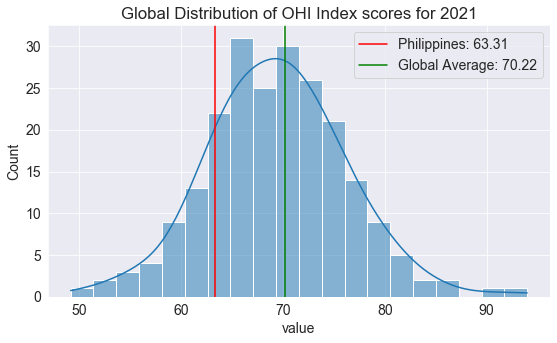

In [25]:
ohi_2021_index_df = ohi_df.loc[(ohi_df['scenario'] == 2021) & (ohi_df['goal'] == 'Index') & (ohi_df['dimension'] == 'score')]

sns.histplot(data=ohi_2021_index_df, 
             x='value',
             bins=20,
            kde=True);
plt.axvline(x=ph_2021_index,
            color='red',
            label = 'Philippines: {}'.format(ph_2021_index))
plt.axvline(x=global_2021_index,
            color='green',
            label = 'Global Average: {}'.format(global_2021_index))
plt.legend()
plt.title('Global Distribution of OHI Index scores for 2021');

The global distribution fairly follows a Gaussian distribution, with most of the index scores close to the 2021 global index average of 70.22. The Philippines' 2021 index score of 63.31 is located towards the lower end of the distribution.

Let's check which countries and territories have the highest and lowest 2021 OHI Index scores.

In [26]:
ohi_2021_index_df.sort_values(['value'], ascending=False).head(10)

,scenario,goal,long_goal,dimension,region_id,region_name,value,percentile_rank
232810,2021,Index,Index,score,4,Macquarie Island,93.99,100.000000
232956,2021,Index,Index,score,158,Howland Island and Baker Island,89.89,99.547511
232838,2021,Index,Index,score,35,Ile Europa,85.76,99.095023
233012,2021,Index,Index,score,220,Sint Maarten,85.37,98.642534
232947,2021,Index,Index,score,149,Jarvis Island,83.94,98.190045
232834,2021,Index,Index,score,31,Seychelles,83.31,97.737557
233025,2021,Index,Index,score,248,Saba,81.89,97.285068
232959,2021,Index,Index,score,162,New Zealand,81.78,96.832579
232911,2021,Index,Index,score,111,Turks and Caicos Islands,81.62,96.380090
232832,2021,Index,Index,score,29,Mayotte,81.45,95.927602


The top 10 regions with the highest 2021 OHI index score are:

1. **Macquarie Island (93.99)** in the southwest Pacific Ocean
2. **Howland Island and Baker Island (89.89)** in the southwest Pacific Ocean
3. **Ile Europa (85.76)** in the Mozambique Channel
4. **Sint Maarten (85.37)**, a country in Europe
5. **Jarvis Island (83.94)** in the south Pacific Ocean
6. **Seychelles (83.31)**, a country in Africa
7. **Saba (81.89)** in the Carribean Sea
8. **New Zealand (81.78)**, a country in Oceania
9. **Turls and Caicos Islands (81.62)** in the west Atlantic Ocean
10. **Mayotte (81.45)** in the west Indian Ocean

Note that most of these regions are remote island territories with low populations managed by developed countries, which infers that **less yet better controlled human activity leads to better ocean health**. There are three countries on the top 10 list, namely, Sint Maarten of the Kingdom of Netherlands, Seychelles in Africa, and New Zealand. Of the three, New Zealand has the highest population (5.084 million according to the [World Bank](https://datatopics.worldbank.org/world-development-indicators/)), in contrast to both Seychelles and Sint Maarten where populations are both lower than 100 000. New Zealand's relatively high score as a developed nation can be attributed to a combination of good governance, well-protected biodiversity, and preservation of maritime Māori culture.

Moreover, the top 10 regions with the lowest index score may be examined below.

In [27]:
ohi_2021_index_df.sort_values(['value'], ascending=False).tail(10)

,scenario,goal,long_goal,dimension,region_id,region_name,value,percentile_rank
232889,2021,Index,Index,score,88,Tristan da Cunha,57.63,4.524887
232888,2021,Index,Index,score,86,Saint Helena,56.88,4.072398
232882,2021,Index,Index,score,79,Israel,56.76,3.619910
232896,2021,Index,Index,score,95,Falkland Islands,56.18,3.167421
232848,2021,Index,Index,score,45,Eritrea,55.67,2.714932
232870,2021,Index,Index,score,67,Libya,55.16,2.262443
232994,2021,Index,Index,score,199,Democratic Republic of the Congo,54.23,1.809955
232852,2021,Index,Index,score,49,Sudan,52.88,1.357466
232898,2021,Index,Index,score,97,Liberia,51.90,0.904977
232990,2021,Index,Index,score,195,Ivory Coast,49.14,0.452489


The top 10 regions with the lowest 2021 OHI index score are:

1. **Tristan da Cunha (57.63)** in the central Atlantic Ocean
2. **Saint Helena (56.88)** in the central Atlantic Ocean
3. **Israel (56.76)**, a country of Asia
4. **Falkland Islands (56.18)** in the southwest Atlantic Ocean
5. **Eritrea (55.67)**, a country of Africa
6. **Libya (55.16)**, a country of Africa
7. **Democratic Republic of the Congo (54.23)**, a country of Africa
8. **Sudan (52.88)**, a country of Africa
9. **Liberia (51.90)**, a country of Africa
10. **Ivory Coast (49.14)**, a country of Africa

Most of the countries in the bottom 10 are underdeveloped countries, where poor marine health conservation due to water pollution and possible illegal activities must have been a consequence of slow economic development. Other territories, such as Tristan da Cunha and Saint Helena, are some of the most isolated island territories in the world. Thus, although their marine ecosystems are possibly untouched, scarce socioeconomic presence must have lowered the index scores for these territories.

Next, let us further extend the global distribution to a bivariate heatmap in order to account for the distribution of the index scores throughout the past decade.

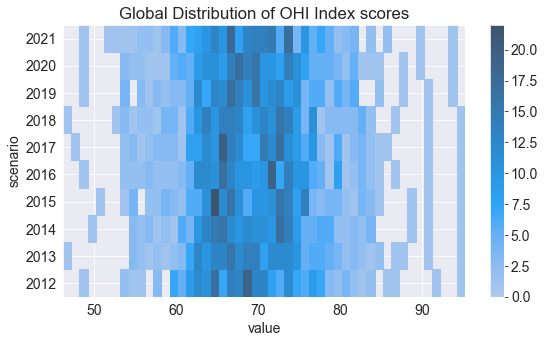

In [28]:
sns.histplot(data=ohi_df.loc[(ohi_df['goal'] == 'Index') & (ohi_df['dimension'] == 'score')],
            x='value',
            y='scenario',
            cbar=True,
            stat='count',
            binwidth=20,
            discrete=True);
plt.title('Global Distribution of OHI Index scores')
plt.yticks(np.arange(2012,2022,1));

The global distributions for each year seem to follow a similar distribution. From this heatmap, it is hard to discern what the global trend for the index score distribution is. For this, let us plot a line graph of the index score of the global average, as well as the Philippines', for each year since 2012.

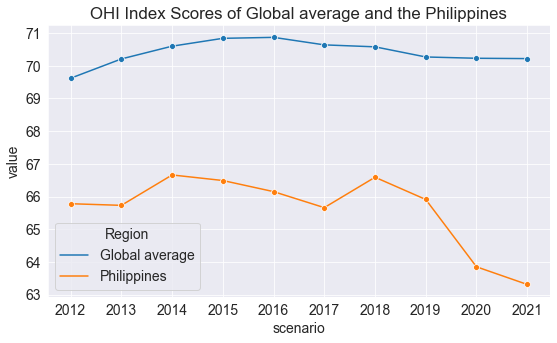

In [29]:
concat_df = pd.concat([ohi_global_df,ohi_ph_df])
concat_df.loc[(concat_df['goal'] == 'Index') & (concat_df['dimension'] == 'score')]

sns.lineplot(data=concat_df.loc[(concat_df['goal'] == 'Index') & (concat_df['dimension'] == 'score')],
             x='scenario',
             y='value', 
             hue='region_name',
             marker='o');
plt.xticks(np.arange(2012,2022,1))
plt.legend(title='Region')
plt.title('OHI Index Scores of Global average and the Philippines');

From the graph, the OHI index global average does not deviate much, as one what might expect from a large global dataset. However, a slow downward trend can be observed starting from 2016, which seemed to slow down after 2020. Since the OHI dataset factors in multiple physical, biological, and socioeconomic factors, there is not one event which might have majorly impacted these trends, may it be climate change or the COVID-19 pandemic, but more likely it's the combination of these. But one thing is for sure: **the ocean's health has been at a slow and steady decline**.

Moreover, another glaring insight can be inferred from the graph. Not only is the Philippines below the global average since 2012; **the OHI index score of the Philippines is also at a fast decline during the recent years**. Our country's score went from about 66.7 from 2018 to almost 63 in 2021, a 4-point decline in a span of only 3 years.

To better put this statistic in the global context, let us graph the percentile rank of the index score of the Philippines starting in 2012. This would provide us an idea on how the decline of the Philippine's ocean health compares to the flow of the global distribution.

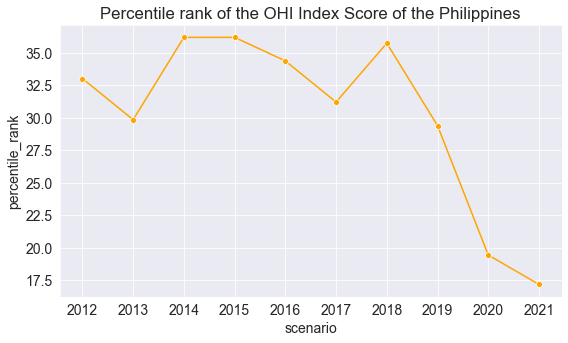

In [30]:
sns.lineplot(data=ohi_ph_df.loc[(ohi_ph_df['goal'] == 'Index') & (ohi_ph_df['dimension'] == 'score')],
             x='scenario',
             y='percentile_rank',
             marker='o',
             color='orange');
plt.xticks(np.arange(2012,2022,1))
plt.title('Percentile rank of the OHI Index Score of the Philippines');

The Philippines' percentile rank dropped from above 35th percentile in 2018 to an **alarmingly low 17th percentile in 2021**; a plunge to the bottom quartile in the 2021 OHI index distribution. Therefore, it is clear that **the ocean health of the Philippines is at a steep decline**. Though our country boasts some of the richest and most diverse marine resources in the world, the Philippines is doing a poor job in preserving and protecting this wealth for sustainability.

As an important next step, let us visualize the Philippines' dimension scores for each individual goal over the past decade. This step will make use of the `PHvsGlobalSubplot` helper function instantiated earlier. By diving deep into the country's performance on each of the 10 individual goals and 4 subgoals, we will be able to pinpoint out which goals the Philippines is failing to achieve, or, optimistically, goals which the Philippines might be is improving on which might not have been reflected by the previous visualizations.

## Artisanal opportunities

![](https://i.imgur.com/jatraYg.jpg)
*Photo from [Oceanwise Aquablog](https://www.aquablog.ca/2020/09/the-role-of-small-scale-fisheries/)*

Small-scale fishing is perhaps the most prevalent livelihood for almost every coastal community in the Philippines. Despite contributing much to the economy of the Philippines, most Philippine fisherfolk do not receive the same opportunities and benefits as large-scale fishing corporations. Thus, the small-scale fishing sector is also as vulnerable and poverty-stricken as it is widespread. In fact, in 2017, the National Anti-Poverty Commission characterized the small-scale fishing community of the Philippines as the [poorest sector of the nation](https://www.land-links.org/research-publication/marine-tenure-and-small-scale-fisheries-learning-from-the-philippines-experience/).

Let us visualize the impact of artisanal opportunities in the Philippines to the physical, biological, and socioeconomic health of the oceans.

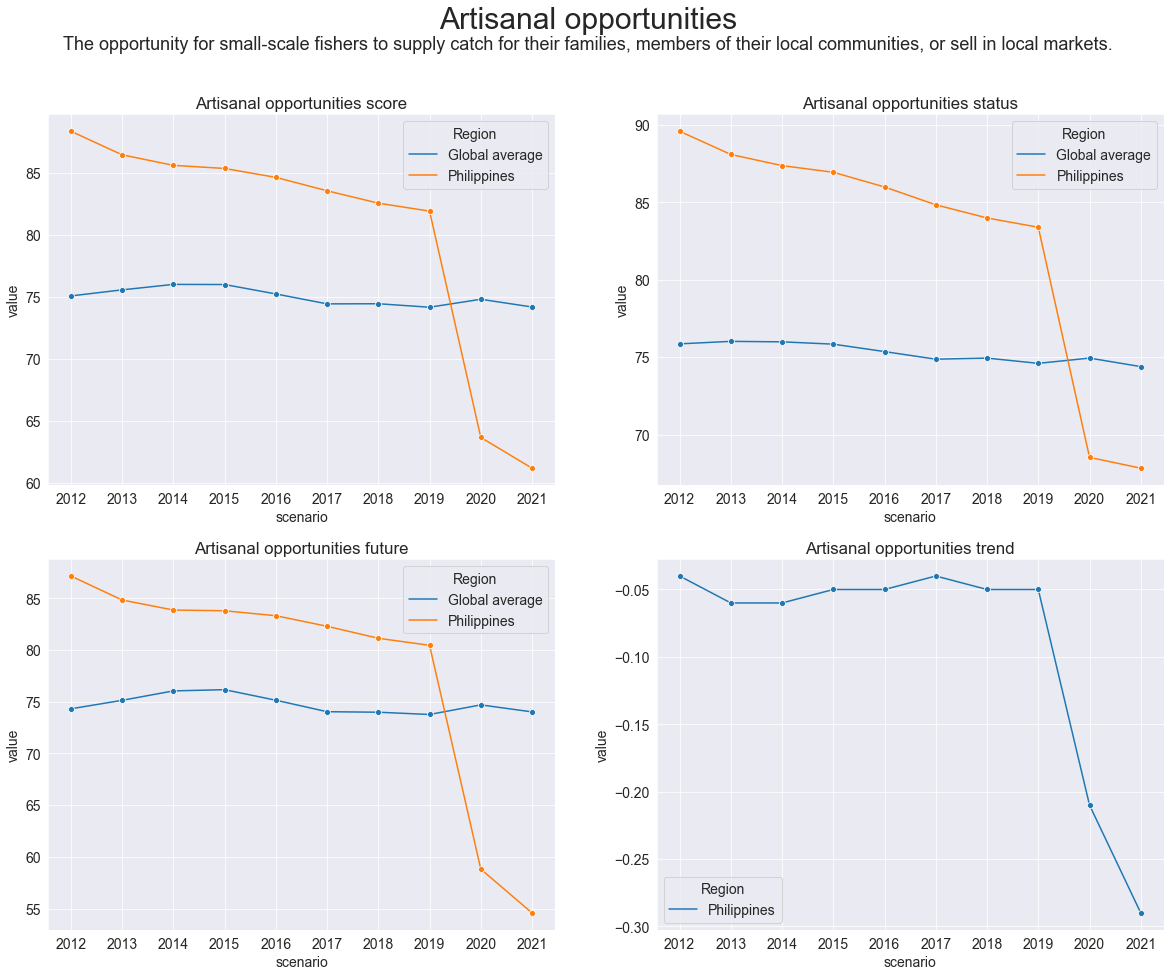

In [31]:
PHvsGlobalSubplot('AO')

According to Section 6.1 of the [OHI methods documentation](https://htmlpreview.github.io/?https://github.com/OHI-Science/ohi-global/published/documents/methods/Supplement.html#iucn_extinction_risk), the scores for Artisanal Opportunities were calculated from two factors: quality of management of the small-scale fishing sector, and economic need for artisanal fishing.

**In 2012, the Philippines had a high score (>85) for the Artisanal Opportunities goal**, almost 10 points above the global average. The score, status, and future then decreased for several years in a gradual manner, as represented by the stable negative trend of around -0.05. This is likely due to the steady increase in demand for food as populations increase nationwide, thus affecting the socioeconomic health of the oceans. However, **the dimension scores for Artisanal Opportunities of the Philippines suffered a massive 20-point plummet in 2020**, which continued to sharply decrease in 2021; the downward spike being visualized by an increasingly negative trend. 

The most probable cause of this shocking drop is the suspension of fishing activities for most of 2020 in the Philippines as a result of the COVID-19 pandemic. The effects of the pandemic on small-scale fishing, specifically in Davao, were explored [in a study by Macus, et al.](https://www.sciencedirect.com/science/article/pii/S0964569121004804), which similarly concluded that the combination of travel restrictions, huge increase in demand, and restrictive lockdowns hindered small-scale fishing communities up to a point where fisherfolk started to consider other livelihoods.

In contrast, the **global average score, status, and future are also slowly decreasing**, albeit much more gradually and even seemingly unaffected by the 2020 pandemic.

Therefore, we may infer from the data that **the drop in Artisanal Opportunities in the Philippines is a local trend**. The goal used to be successful in the Philippines in the past, but urbanization and development might have caused the small-scale fishing sector to lag behind over time, which then ultimately succumbed to the COVID-19 pandemic.

To better visualize the statistic with respect to the global distribution, a line graph of the Philippine's percentile rank for the goal can be created.

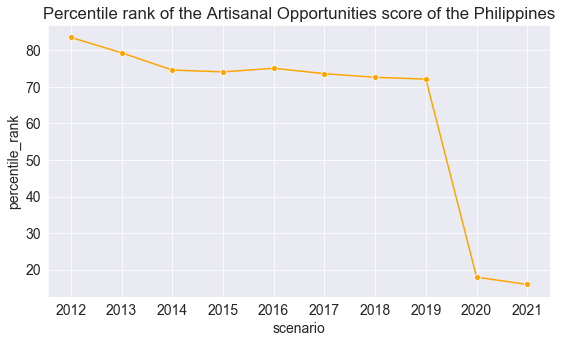

In [32]:
sns.lineplot(data=ohi_ph_df.loc[(ohi_ph_df['goal'] == 'AO') & (ohi_ph_df['dimension'] == 'score')],
             x='scenario',
             y='percentile_rank',
             marker='o',
             color='orange');
plt.xticks(np.arange(2012,2022,1))
plt.title('Percentile rank of the Artisanal Opportunities score of the Philippines');

The drop in terms of percentile rank was from above 80th down to below 20th. We may also check the top regions with the most negative trend for Artisanal Opportunities.

In [33]:
ohi_df.loc[(ohi_df['goal'] == 'AO') & (ohi_df['dimension'] == 'trend') & (ohi_df['scenario'] == 2021), ['scenario','long_goal','dimension','region_name','value']].sort_values(['value']).head(10)

,scenario,long_goal,dimension,region_name,value
220409,2021,Artisanal opportunities,trend,Palau,-0.56
220437,2021,Artisanal opportunities,trend,Maldives,-0.51
220410,2021,Artisanal opportunities,trend,Micronesia,-0.42
220498,2021,Artisanal opportunities,trend,South Africa,-0.39
220531,2021,Artisanal opportunities,trend,Ecuador,-0.33
220522,2021,Artisanal opportunities,trend,Saint Vincent and the Grenadines,-0.31
220527,2021,Artisanal opportunities,trend,Honduras,-0.29
220416,2021,Artisanal opportunities,trend,Philippines,-0.29
220455,2021,Artisanal opportunities,trend,Madeira,-0.26
220461,2021,Artisanal opportunities,trend,Western Sahara,-0.19


From the table, **the Philippines has the 8th sharpest decreasing score in Artisanal Opportunities in 2021**. The other sharply decreasing regions with prevalent small-scale fishing sectors include Palau and Micronesia. This signifies that the impact of COVID-19 on small-scale fishing reaches even the remote areas of the planet.

## Biodiversity: Habitat and Species

![](https://i.imgur.com/BXYRLSe.jpg)
*Photo from [NOAA](https://sanctuaries.noaa.gov/science/assessment/pmnm.html)*

The marine biodiversity of the Philippines is a world treasure. Our country lies at the center of the Coral Triangle, housing a breathtaking ecosystem of marine life that many consider the world's center of marine biodiversity. But these ecosystems are at risk, especially with the rise of climate change as well as overexploitation. As a matter of fact, according to the [Unico Conservation Foundation](https://unicoconservationfoundation.org.au/philippines-coral-reefs-the-amazon-of-the-sea/), the United Nations Environment Program declared that 97% of the biodiverse marine areas in the Philippines are threatened by destructive human activities.

Let us visualize the contribution of the biodiversity of the Philippines to the health of Philippine oceans.

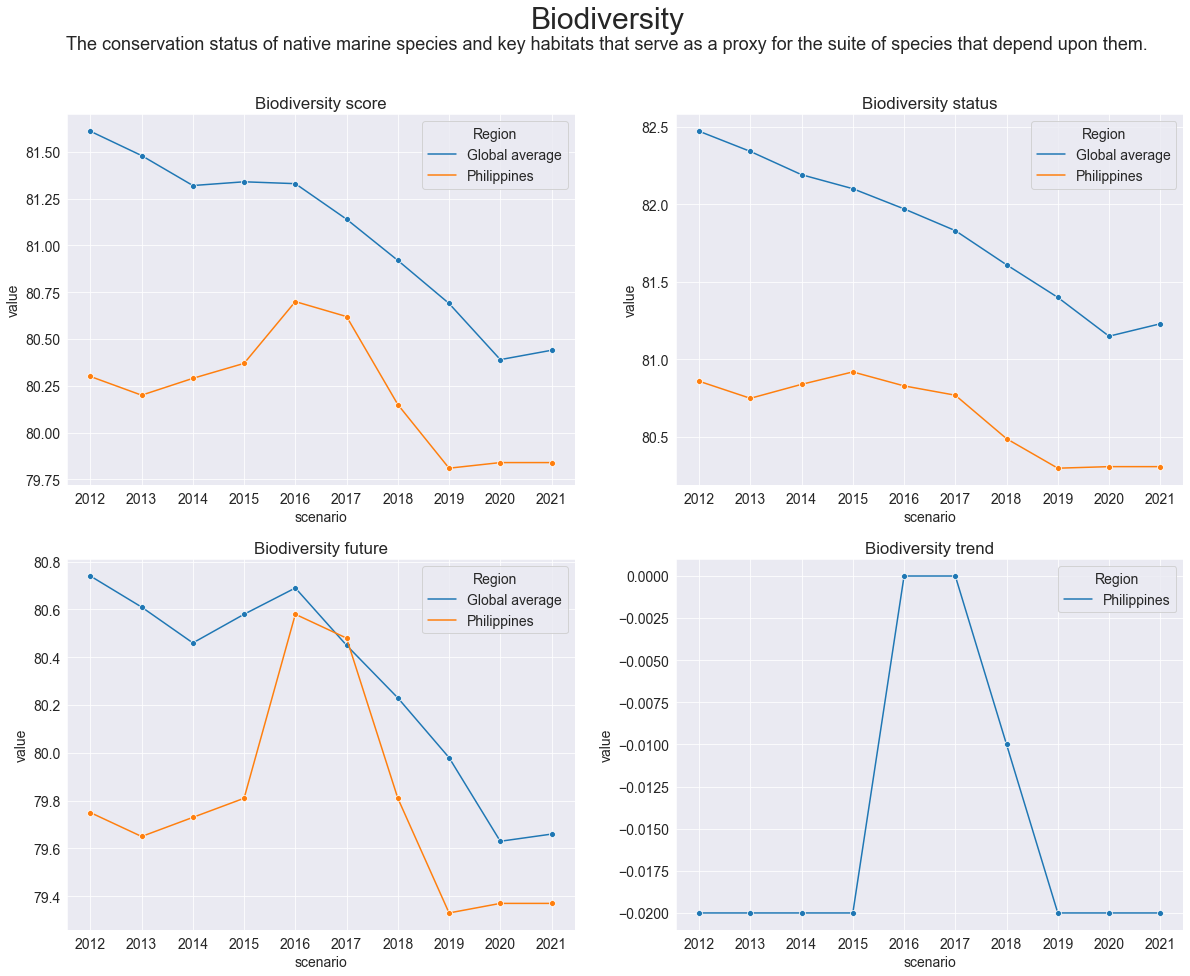

In [34]:
PHvsGlobalSubplot('BD')

Interestingly, the **Biodiversity goal score of the Philippines is below the global average for all OHI assessment scenarios since 2012**. This could signify that although the Philippines has an undoubtedly rich marine biodiversity, the negative effects of human intervention and poor conservation efforts are starting to, or already has, outweighed the natural wealth of our oceans. 

Moreover, the **Philippines experienced a local increase in Biodiversity score and future in 2016**. It is possible that the implementation of the DENR project [Coastal and Marine Ecosystems Management Program (CMEMP)](https://bmb.gov.ph/index.php/major-programs-cmemp/cmemp) in 2016, as well as the discovery of [marine biodiversity in the Benham Rise](https://oceana.org/blog/diverse-marine-life-recorded-2016-benham-rise-expedition/), might have contributed to the slight local increase. However, the Philippines then experienced a steady decrease in the score, status, and future values from 2016-2019, but then stabilized from 2019-2021. This trend also parallels the global average trends. This observation could be an evidence that  **decreasing human activity due to the COVID-19 pandemic has stabilized global ocean health in terms of Biodiversity**.

To further explore these trends, similar visualizations could be created for the Biodiversity subgoals: Habitat and Species.

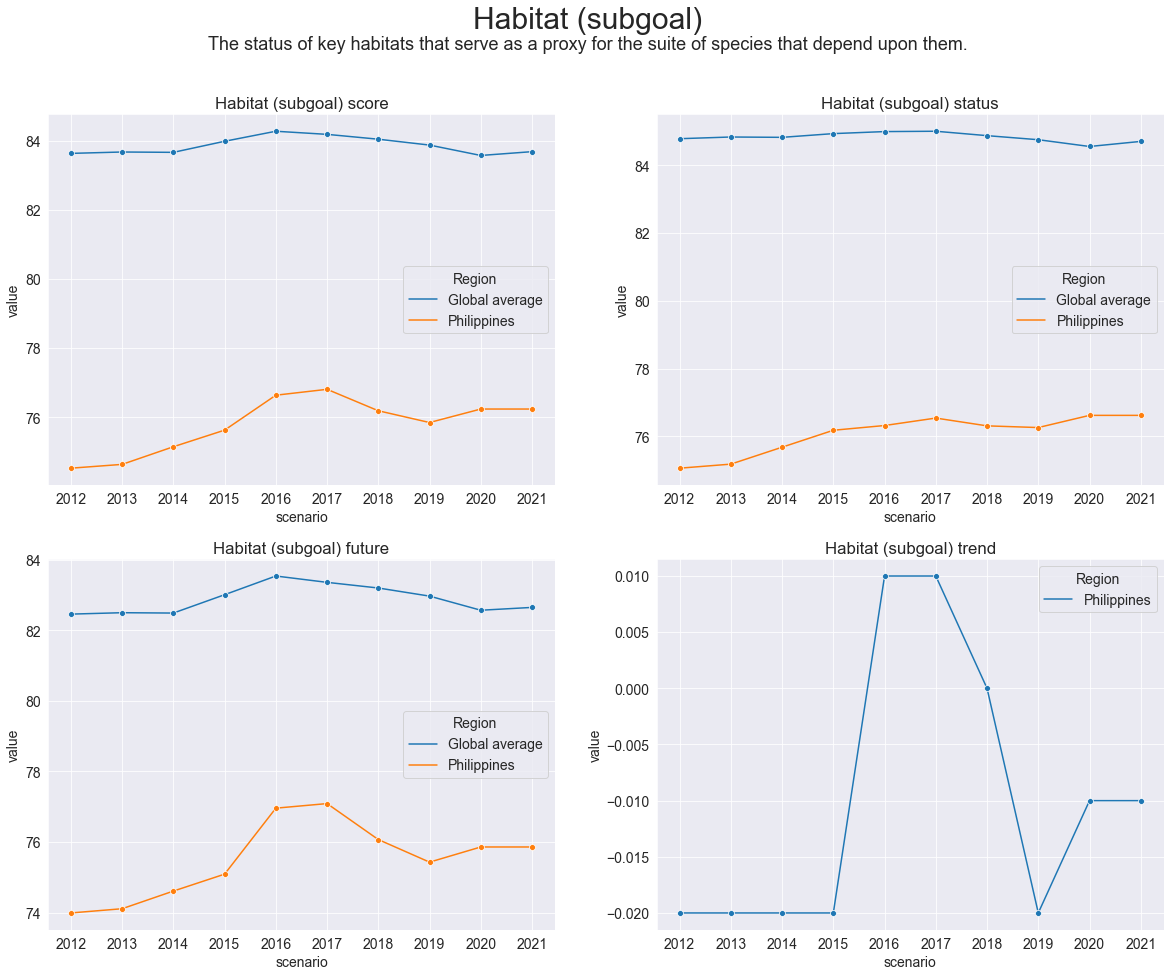

In [35]:
PHvsGlobalSubplot('HAB')

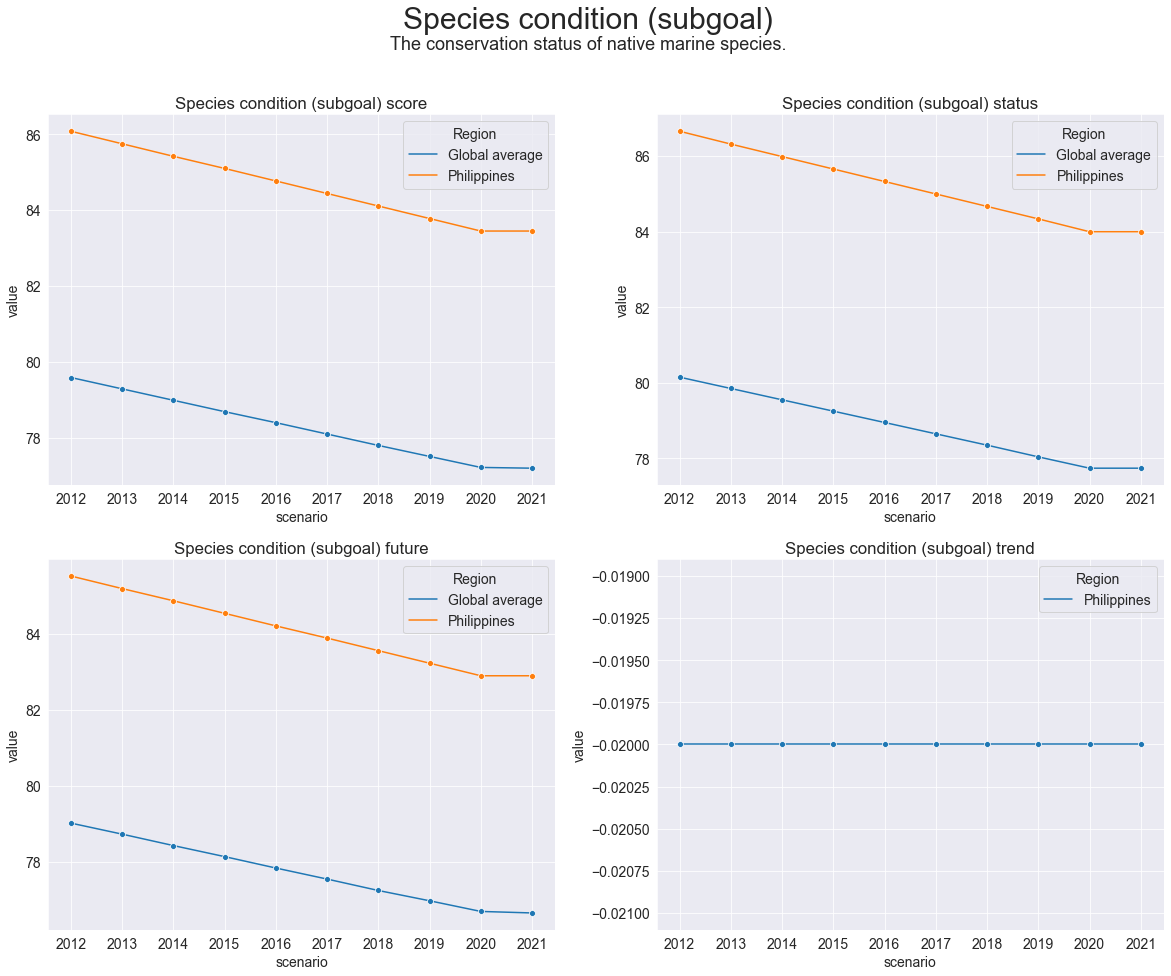

In [36]:
PHvsGlobalSubplot('SPP')

According to Section 6.2.1 of the [OHI methods documentation](https://htmlpreview.github.io/?https://github.com/OHI-Science/ohi-global/published/documents/methods/Supplement.html#iucn_extinction_risk), the Habitats score were calculated from conditions and trends of coral, mangrove, saltmarsh, sea ice, seagrass, and soft bottom extents. Meanwhile, Section 6.2.2 emphasizes the conservation status and trends of key marine species based on International Union for Conservation of Nature (IUCN) datasets.

A couple of interesting insights could be gathered from the data visualizations above for the Habitat and Species subgoals of Biodiversity. 

**The Philippines is above global average in terms of Species, and below global average in terms of Habitat**. This could imply that the poor condition of Philippine coral reefs is the main factor reducing the Biodiversity score of the country. In fact, this shortcoming is acknowledged by [BFAR](https://www.bfar.da.gov.ph/habitat.jsp?id=4), citing   understaffed and insufficiently funded agencies and units which are in charge of management of coral reefs.

Furthermore, **the Philippines' Species score is slowly decreasing**. It is possible that the overexploitation of fish resources resulting in many species becoming endangered is becoming a larger threat to species biodiversity in both the Philippines and the world. Of course, this doesn't mean that we should only focus on one aspect of marine biodiversity conservation. But it is interesting to observe which aspects are growing and falling; it provides a better perspective on how government laws and community practices are influencing marine biodiversity in the Philippines. Even then, the observed trend is parallel to global trends, so it is possible that a larger scale influence is at play for both subgoals, such as climate change.

Therefore, we can conclude that **the sheer wealth of Philippine marine biodiversity does not fully reflect the overall health of the Philippine oceans**. How we interact, conserve, and protect our marine biodiversity is just as important of a metric, and the data is telling us that our country does not put in the best efforts in doing so.

## Coastal Protection

![](https://upload.wikimedia.org/wikipedia/commons/thumb/a/a2/OregonCoastEcola_Edit.jpg/1920px-OregonCoastEcola_Edit.jpg)
*Photo from user [Cacophony, Wikimedia](https://en.wikipedia.org/wiki/Oregon_Coast#/media/File:OregonCoastEcola_Edit.jpg)*

The Philippines is lined with 36 289 kilometers of diverse coasts, the fifth longest in the world according to [CIA Philippines](https://www.cia.gov/the-world-factbook/countries/philippines/). This geography, combined with the plethora of naturally occurring hydrometeorological hazards, makes the goal of Coastal Protection a challenging one for the Philippines. Natural buffers against waves and erosion such as seagrasses, seaweeds, and mangroves are widespread in the Philippines. However, their destruction in favor of urbanization of coastlines has posed a serious threat to many coastal communities in the country, potentially resulting in coastal erosion and subsidence and thus greater vulnerabilty to typhoons and storm surges.

Let us visualize the status of coastal Protection in the philippines with respect to other regions in the world.

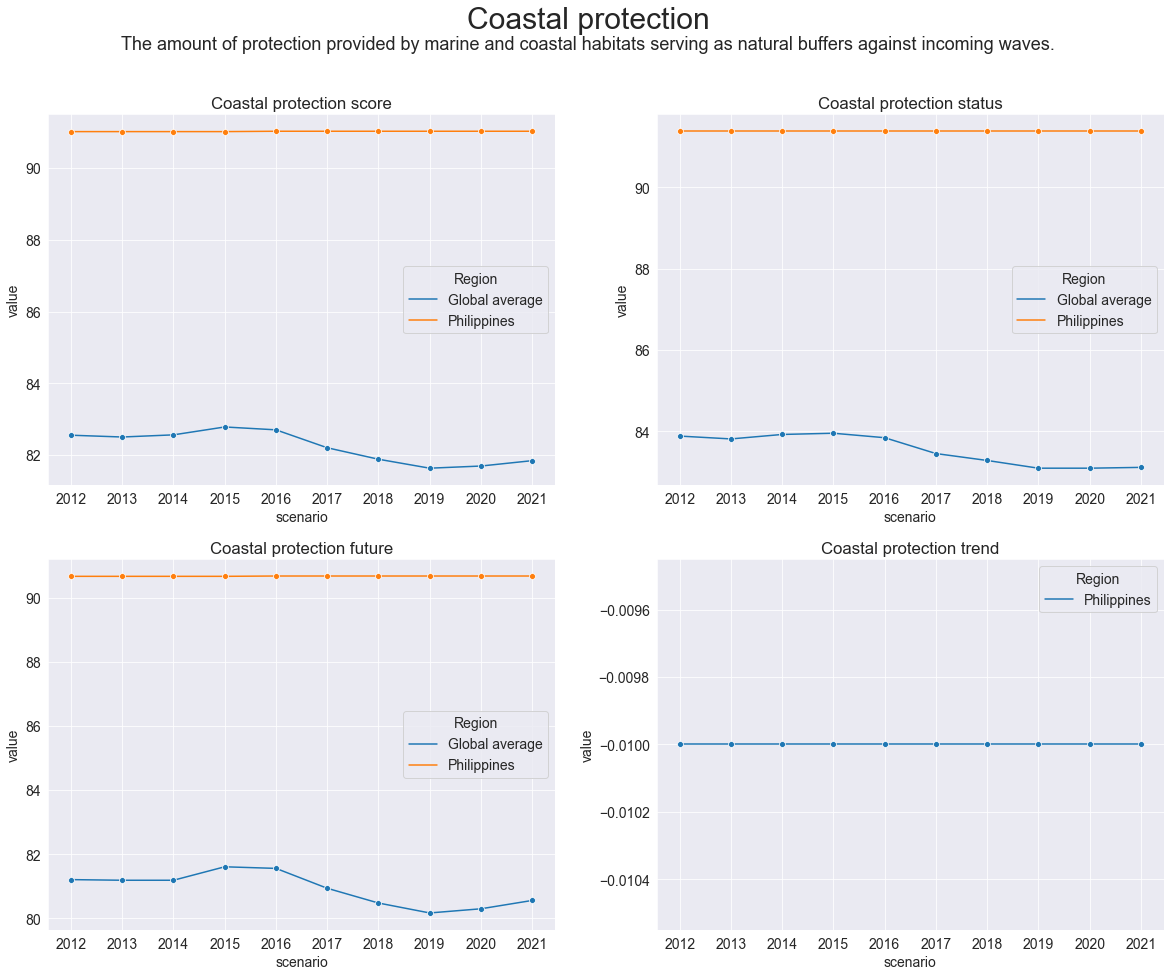

In [37]:
PHvsGlobalSubplot('CP')

Surprisingly, **the Philippines has scored consistently high in Coastal Protection (90+), 8 points above the global average, in every year**. This could imply that coastal protection efforts in the Philippines have been more successful relative to other regions in the world. Multiple projects and programs have been conducted by the government and local and international organizations focusing on coastal protection, such as the [National Integrated Coastal Management Program](https://faspselib.denr.gov.ph/sites/default/files//Publication%20Files/1.NICMP_FINAL.pdf) and [ProCoast programs](https://www.giz.de/en/worldwide/74611.html) of the DENR and [Coastal Resource Management Project (CRMP)](https://www.tetratech.com/en/projects/philippines-coastal-resource-management) of U.S. Agency for International Development (USAID).

The data provides an optimistic sign that the Philippines' natural coastal protection is in an overall good status with respect to other regions of the world, especially that the local communities are also starting to realize its importance following the effects of numerous typhoons that caused devastating effects to unprotected coastal communities during the past years. Still, this is not a sign that we should overlook the current problems facing coastal protection, namely, deforestation, sediment extraction, resource explotation, and others. These local problems are very much still present, and many communities are still experiencing worsening coastal protection and thus increasing vulnerability to hydrometeorologic hazards. 

Our coastal protection scores relative to the world may be high, but many regions of the world do not experience 15-20 typhoons a year. We must continue to support local and government policies, projects, and programs for coastal protection, and encourage coastal communities to work on and practice coastal management strategies.

## Carbon Storage

![](https://newnaratif.com/wp-content/uploads/2018/11/shutterstock_464828657-1200x500.jpg)
*Photo from [mangroveactionproject.blogspot.com](https://mangroveactionproject.blogspot.com/2018/11/)*

According to the [Global Development Research Center](https://www.gdrc.org/oceans/fsheet-02.html), the oceans sequester 30-50% of the carbon generated by burning of fossil fuels, making them an essential factor in the fight against climate change. Blue carbon, the carbon stored by marine and coastal ecosystems, is sequestered most prominently by algae, seagrasses, saltmarshes, and mangroves as carbon eventually stored in the soil. As an archipelago in the tropical region, the potential for carbon storage in the Philippines' marine environments may be one of the most impactful ways our country can contribute to the fight against climate change. But they may also be our doom if we allow these ecosystems to be relentlessly destroyed.

Let us visualize the current carbon storage potential of the coasts of the Philippines compared to others in the world.

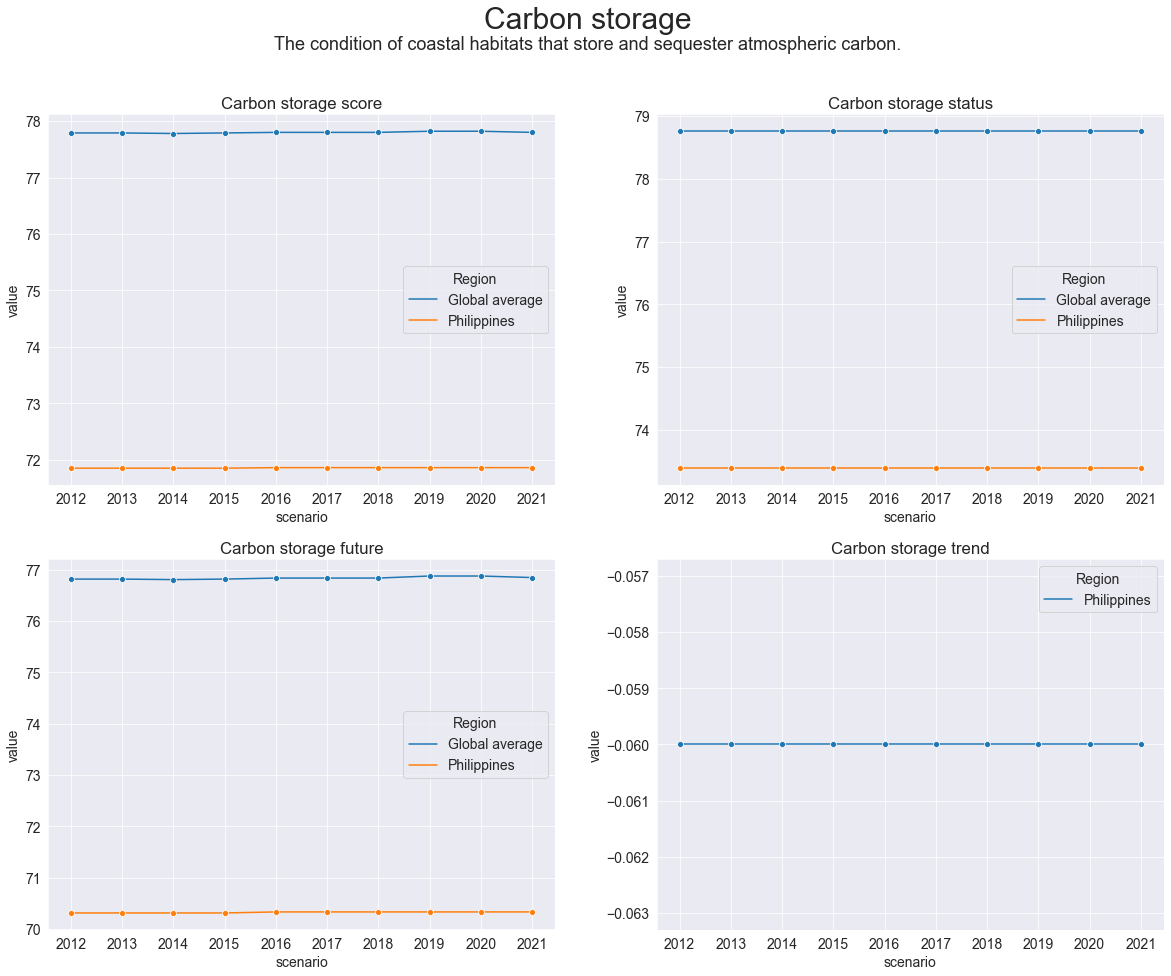

In [38]:
PHvsGlobalSubplot('CS')

Surprisingly, despite garnering high scores for coastal protection, **the Philippines' carbon storage score is below the global average by about 7 points every year**. To explain this discrepancy, it would be helpful to check the OHI documentation for both Carbon Storage and Coastal Protection. 

From the documentation: Coastal Protection is influenced by the following factors and corresponding weights, with 4 being the most protective according to Tallis et al. (2011):

| Habitat | Protectiveness rank |
| ----------- | ----------- |
| mangroves | 4 |
| saltmarshes | 4 |
| coastal sea ice | 4 |
| coral reefs | 3 |
| seagrasses | 1 |
| kelp | 1 |

*data from Table 6.4 of [OHI methods documentation](http://htmlpreview.github.io/?https://github.com/OHI-Science/ohi-global/published/documents/methods/Supplement.html).*

Moreover, Carbon Storage is determined by the extent of the following coastal ecosystems, scaled by sequestration potential according to Laffoley & Grimsditch (2009):

| Habitat | Sequestration (weight) |
| ----------- | ----------- |
| mangroves | 139 |
| saltmarshes | 210 |
| seagrass | 83 |

*data from Table 6.5 of [OHI methods documentation](http://htmlpreview.github.io/?https://github.com/OHI-Science/ohi-global/published/documents/methods/Supplement.html).*

There are two interesting points upon comparing the two tables.

First, coral reef extent is a major factor for Coastal Protection but is absent for Carbon Storage. According to [Kinsley and Hopley](https://www.sciencedirect.com/science/article/abs/pii/092181819190117F), coral reefs worldwide sequester about 2% of anthropogenic carbon emissions, which is small in comparison to 30-50% sequestration by coastal ecosystems. However, the omission of this factor for Carbon Storage must have greatly affected the Philippines, especially as being the central part of the Coral Triangle. Moreover, the large weight of coral reefs for carbon storage could also imply that our **extensive coral reef populations were a significant factor in increasing the Philippine's coastal protection score**, further stressing the importance of protecting our coral reefs for the sake of biodiversity as well as for the protection of our coastal communities.

Second, saltmarshes have a higher carbon sequestration potential than mangroves. Upon inspection of mapping datasets from the [United Nations Environment Programme World Conservation Monitoring Centre](https://data.unep-wcmc.org/), coral, mangrove, and seagrass extents are well-documented for the Philippines. However, saltmarsh extent in the Philippines is poorly documented, with only 2 existing datapoints. **The incompleteness in data for seagrass extent could potentially explain the relatively low score for Carbon Storage.** Thus, in order to more accurately determine the carbon sequestration potential of the Philippines; coastal environments, we need to extend our efforts in mapping not only our mangroves but also our saltmarshes, especially as the latter is prone to disappearance by rising sea levels.

## Clean Waters

![](http://s3-us-west-2.amazonaws.com/bie-ootg/images/_slide1x/water-650234.jpg)
*Photo from [Buck Institute for Education](http://ootg.pblworks.org/ootg/projects/design-it-clean)*

Ocean pollution comes in several forms: trash, radiation, chemical sources, and even noise and light. From communities to waterways to the ocean, it is unfortunate that global marine environemnts are becoming a dead-end dumping site of many anthropogenic wastes, resulting in significant changes in ocean chemistry which could result in the collapse of marine ecosystems; an event which could eventually end to our own misery. This misery is a major issue in the Philippines today; according to the [Water Environment Partnership in Asia (WEPA)](http://www.wepa-db.net/policies/state/philippines/overview.htm), overpopulation and industrialization has led to the continuining reduction of the quality of ocean waters in the Philippines.

Let us visualize the water quality of the Philippine's oceans in comparison to the global average.

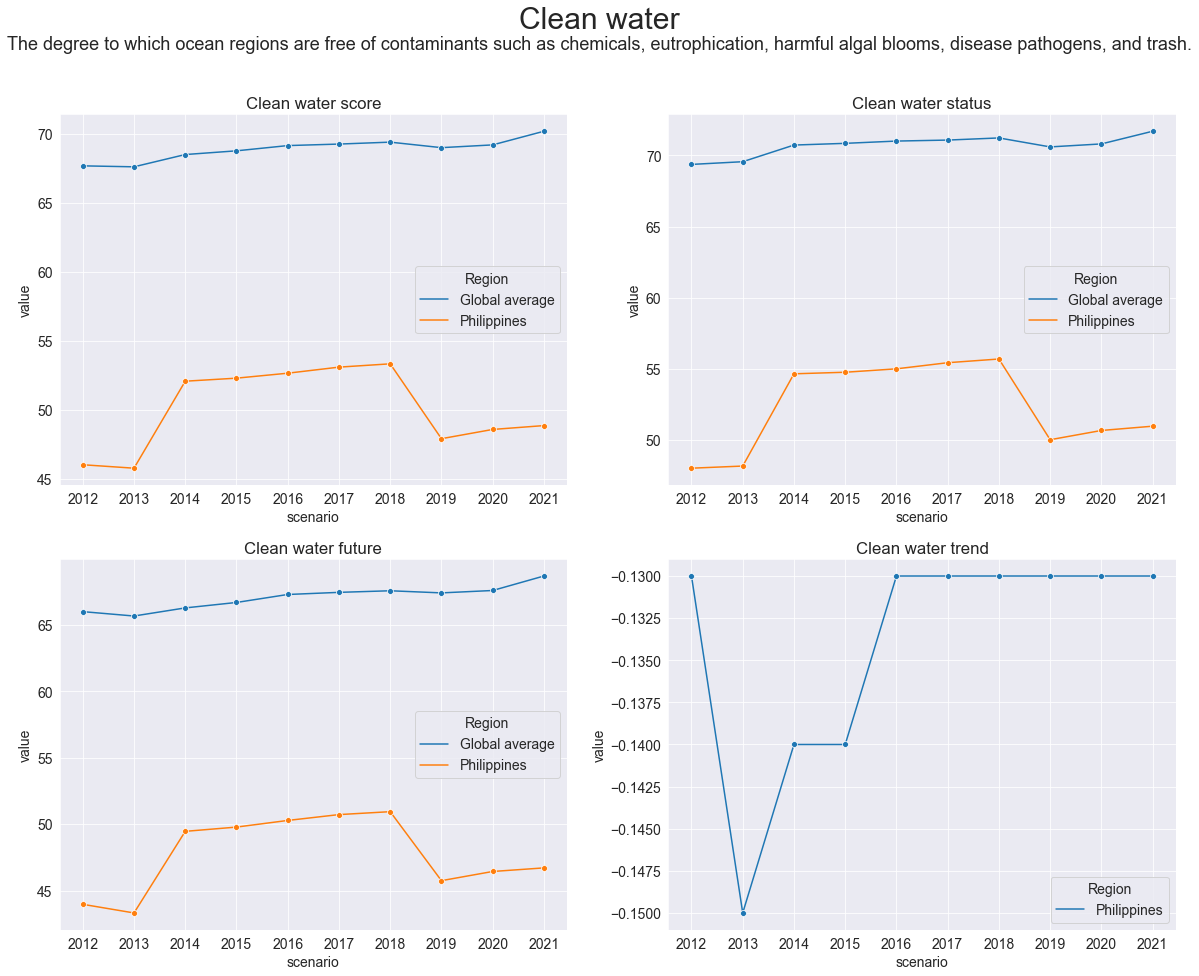

In [39]:
PHvsGlobalSubplot('CW')

Section 6.5 of the [OHI methods documentation](https://htmlpreview.github.io/?https://github.com/OHI-Science/ohi-global/published/documents/methods/Supplement.html#iucn_extinction_risk) listed four major factors used to calculate the Clean Waters score: coastal chemical pollution, coastal nutrient pollution, pathogen pollution, and plastic pollution.

**The Philippines's score for Clean Water is about 30 points below the global average of ~70 for almost every year**; certainly not a good sign for Philippine oceans. A spike in around 2014-2018 could be observed, however it is likely that this trend is a result of new algorithms recalculating the data from previous OHI assessments, which is evident in the small spike for the global average as well. However, it is surprising that **the global average for Clean Water is slowly rising**, which could be a positive sign for worldwide efforts on combatting ocean pollution. However, minus the erroneous trend, the increasing trend is much slower for the Philippines, a sign that our country is failing to catch up to the global efforts.

To provide a better perspective, let us plot the percentile score of the Philippines' Clean Water score over time.

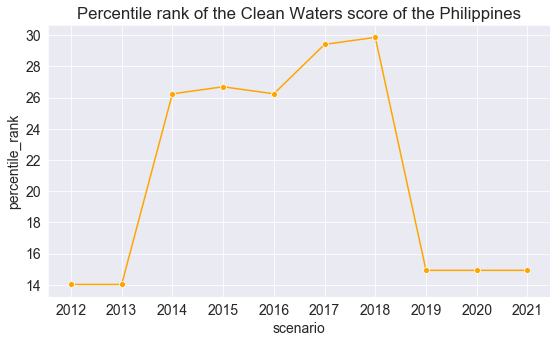

In [40]:
sns.lineplot(data=ohi_ph_df.loc[(ohi_ph_df['goal'] == 'CW') & (ohi_ph_df['dimension'] == 'score')],
             x='scenario',
             y='percentile_rank',
             marker='o',
             color='orange');
plt.xticks(np.arange(2012,2022,1))
plt.title('Percentile rank of the Clean Waters score of the Philippines');

Again, without the erroneous trend, the Philippines' Clean Waters score lies consistently at a low 14-15th percentile. From a report by [UN Environment Programme and the Coordinating Body on the Seas of East Asia (COBSEA)](https://www.sea-circular.org/country/philippines/#:~:text=The%20Philippines%20is%20one%20of,(GAIA%2C%20March%202020)), the Philippines' statistics for plastic pollution is one of the worst in the world: plastic packaging is used for about 48% of the products contributing to an alarming 0.28-0.75 million tonnes of marine plastic waste every year — about 767 to 2055 tonnes per day! Moreover, extensive agricultural runoff has resulted in increasing frequency of harmful algal blooms in the Philippines, most frequently as Paralytic Shellfish Poisoning (PSP). In addition to these, disease-causing pathogens in marine environments caused by high fecal coliform levels have also become a problem, especially in urban areas of the Philippines.

However, measures are being planned and practiced to help combat the alarming decrease of ocean water quality in the Philippines. On July 2021, the [House of Representatives](https://www.pna.gov.ph/articles/1148600) successfully passed a bill banning single-use plastics. Local clean-up efforts such as the Battle for Manila Bay are helping to combat high fecal coliform levels, despite national controversies. 

All in all, the data implies that **the Philippines' clean water status is among the lowest in the world**, and it will continue to gravely affect the health and well-being of many of our coastal communities if we do not act against it as soon as possible.

## Food Provision: Wild-caught Fisheries and Mariculture

![](https://wfpc.sanford.duke.edu/sites/wfpc.sanford.duke.edu/files/news-images/should-i-eat-fish-229789.jpeg)
*Photo from [Duke Sanford World Food Policy Center](https://wfpc.sanford.duke.edu/news/what-about-fish-bringing-fisheries-food-policy-global-discourse)*

Perhaps the most direct way that humans interact with the oceans is through the oceans being a source of food. Fishes, mollusks, crustaceans, algae — the oceans harbor an endless menu of classic as well as exotic varieties of food, whether for everyday consumption or as ingredients in luxurious dishes. According to [Rosario](https://www.fao.org/3/i0202e/i0202e11.pdf), The Philippine fisheries sector is a fundamental contributor to the country's economy, trade, and poverty alleviation. In 2020, [BFAR](https://beta.bfar.da.gov.ph/wp-content/uploads/2021/04/BFAR-ANNUAL-NARRATIVE-REPORT.pdf) reported that the Philippines; fishing sector had an estimated volume of production of 3.2 million metric tons, an increase from the previous year and is expected to further increase as national and global demand for food continues to grow.

Let us visualize the impact of food provision in the health of Philippine oceans with respect to the global average.

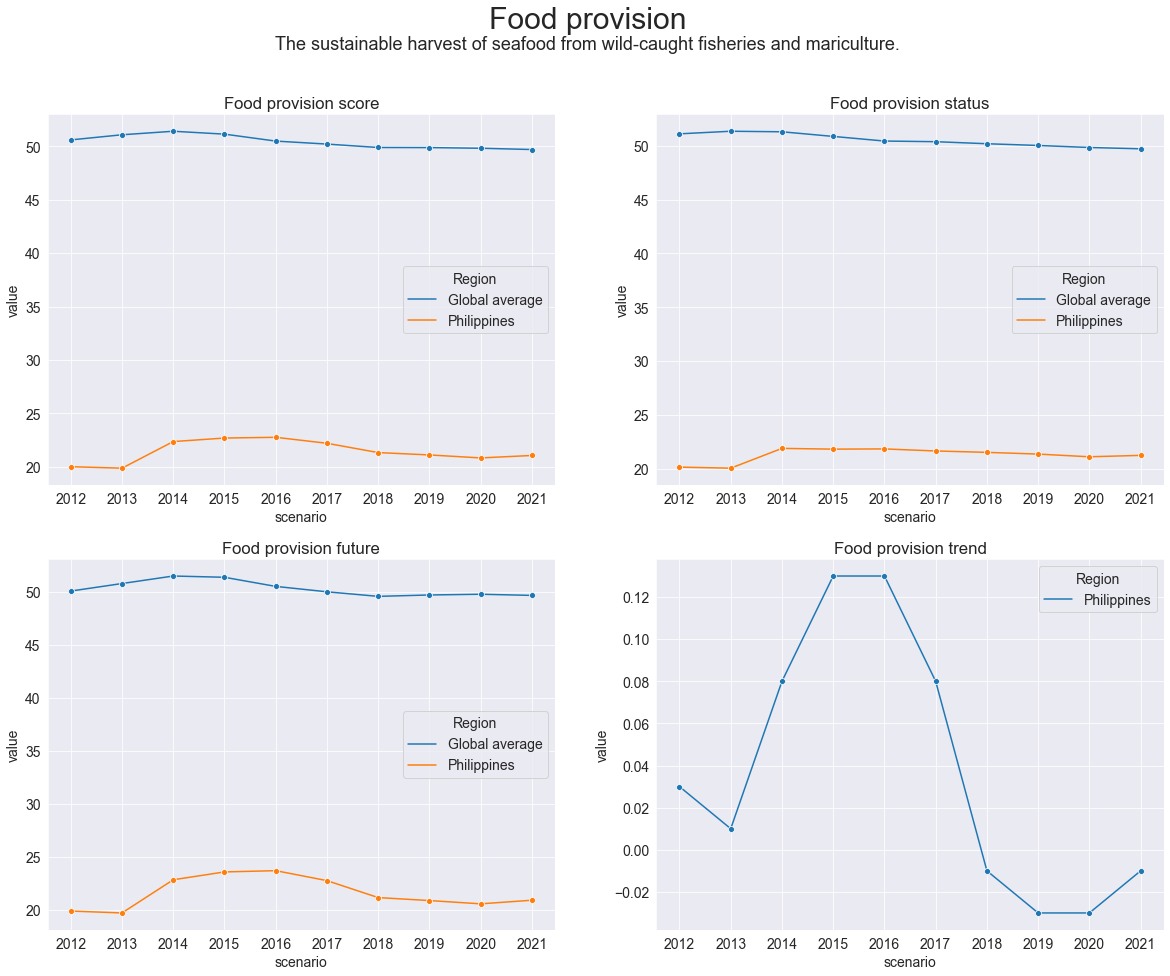

In [41]:
PHvsGlobalSubplot('FP')

Despite being a major contributor to the global seafood industry, **the Philippines scores 30 points below the global average of 50 for Food Provision for almost every year**. This discrepancy could be similar to the observation for Biodiversity, that is, it is not the wealth of marine resources that is significant to the statistic, but instead the sustainability factor as a degree for gauging ocean health. From Section 6.6.1 of the [OHI methods documentation](https://htmlpreview.github.io/?https://github.com/OHI-Science/ohi-global/published/documents/methods/Supplement.html#iucn_extinction_risk): *this [fisheries] model aims to assess the amount of wild-caught seafood that can be sustainably harvested with penalties assigned for over-harvesting*.

To determine which sector the Philippines is struggling to keep sustainably, let us visualize the scores for the two subgoals of Food Provision: Wild-caught Fisheries and Mariculture.

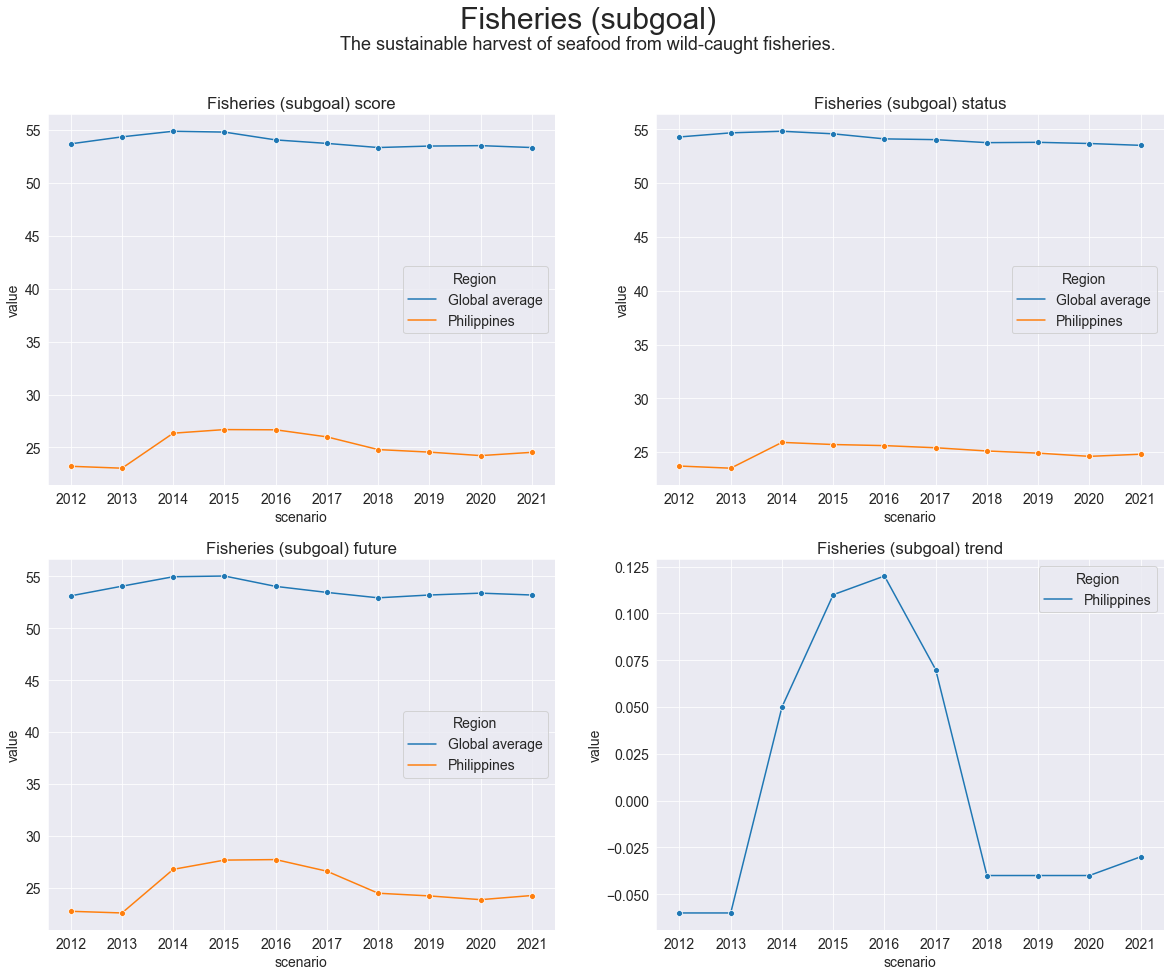

In [42]:
PHvsGlobalSubplot('FIS')

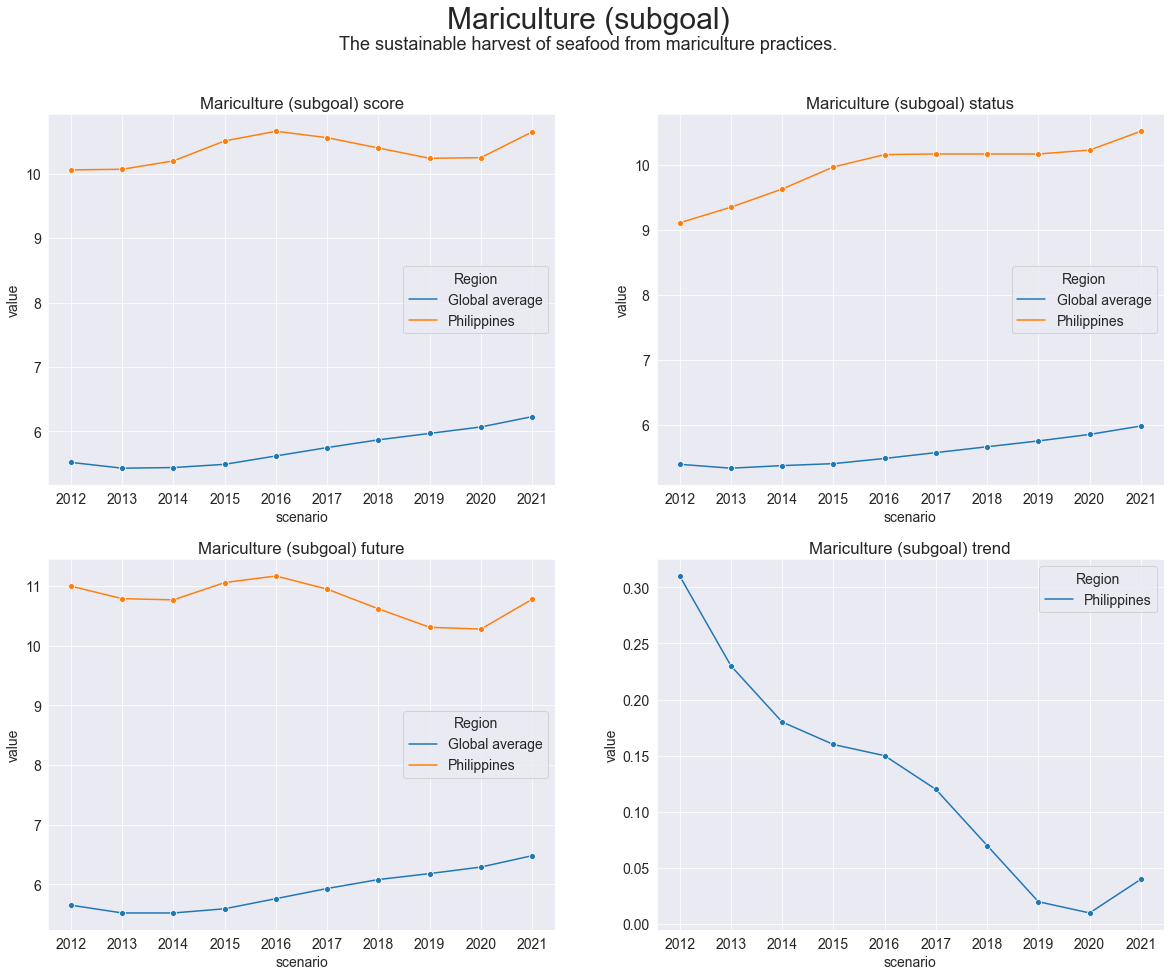

In [43]:
PHvsGlobalSubplot('MAR')

It appears that both Fisheries and Mariculture contribute to the low score for Food Provision. However, **the Philippines is above the global average for mariculture**, even though both the Philippines and the global average scores for Mariculture are below 15. The very low scores for mariculture could be explained by the fact that many regions in the world do not have prominent mariculture practices, which could be observed by checking both the percentile rank of the Philippines as well as the bottom 10 countries for Mariculture below.

In [46]:
zero_mariculture = ohi_df.loc[(ohi_df['goal'] == 'MAR') & (ohi_df['dimension'] == 'score') & (ohi_df['scenario'] == 2021) & (ohi_df['value'] == 0) , ['scenario','long_goal','dimension','region_name','value']]

print('The number of regions with Mariculture score of zero is {}, which is {}% of the regions'.format(zero_mariculture.shape[0],zero_mariculture.shape[0]*100/220))
zero_mariculture

The number of regions with Mariculture score of zero is 89, which is 40.45454545454545% of the regions


,scenario,long_goal,dimension,region_name,value
237680,2021,Mariculture (subgoal),score,Cocos Islands,0.0
237681,2021,Mariculture (subgoal),score,Christmas Island,0.0
237682,2021,Mariculture (subgoal),score,Norfolk Island,0.0
237688,2021,Mariculture (subgoal),score,Micronesia,0.0
237690,2021,Mariculture (subgoal),score,Marshall Islands,0.0
...,...,...,...,...,...
237890,2021,Mariculture (subgoal),score,Jersey,0.0
237891,2021,Mariculture (subgoal),score,Guernsey,0.0
237894,2021,Mariculture (subgoal),score,Oecussi Ambeno,0.0
237898,2021,Mariculture (subgoal),score,Saba,0.0


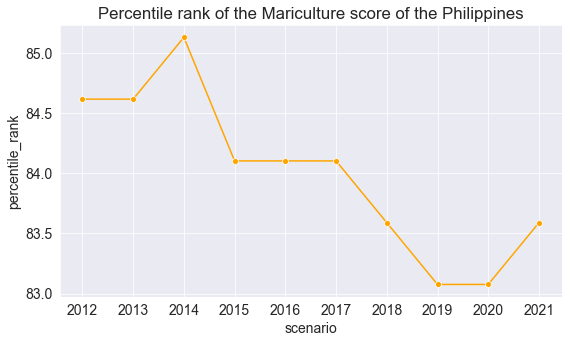

In [47]:
sns.lineplot(data=ohi_ph_df.loc[(ohi_ph_df['goal'] == 'MAR') & (ohi_ph_df['dimension'] == 'score')],
             x='scenario',
             y='percentile_rank',
             marker='o',
             color='orange');
plt.xticks(np.arange(2012,2022,1))
plt.title('Percentile rank of the Mariculture score of the Philippines');

Indeed, the Philippines hovers around the relatively high 83-85th percentile rank for Mariculture, and most of the 89 regions (comprising 45% of the regions in the database) with a zero-score in mariculture have non-existent or early-developing mariculture practices. However, this distinction does not undermine the current issues faced by Philippine mariculture. A local score of 11 is still not a good statistic, even if it is above average. [Salayo, et al.](https://repository.seafdec.org.ph/handle/10862/1599) cited that mariculture in the Philippines has not achieved satisfactory development results due to a combination of policy and management issues, in fact only 0.54% of the planned area of mariculture parks were established 10 years after the project implementation by BFAR in 2001, though current efforts are by BFAR are focused in improving aquaculture and mariculture as acknowledged through their [fisheries development program](https://beta.bfar.da.gov.ph/wp-content/uploads/2021/04/BFAR-ANNUAL-NARRATIVE-REPORT.pdf).

Moreover, two local trends can be observed for both Fisheries and Mariculture: **a steady decrease for fisheries**, while there is a **steady increase for mariculture**. These trends parallel the annual reports of [BFAR's](https://beta.bfar.da.gov.ph/wp-content/uploads/2021/04/BFAR-ANNUAL-NARRATIVE-REPORT.pdf) 2020 Fisheries Situation Report, noting that both commercial and municipal fisheries have experienced annual decline, yet aquaculture and mariculture continues to grow in volume of production. The aggregated volume for both, however, is declining annually. For comparison, the Philippines in 2015 reached 4.65 million metric tons of seafood volume [(BFAR)](https://www.bfar.da.gov.ph/files/img/photos/2015FisheriesProfile(Final).pdf), in comparison to the recent 2020 figure of 3.2 million metric tons [(BFAR)](https://beta.bfar.da.gov.ph/wp-content/uploads/2021/04/BFAR-ANNUAL-NARRATIVE-REPORT.pdf).

Furthermore, despite slowly increasing scores, the **status and future values for Mariculture are dropping**, indicating that mariculture growth might soon reach a peak and start to drop in the future. These trends may continue to worsen as food provision sustainability becomes a much harder goal to achieve due to rising demand from population and the COVID-19 pandemic, as well as detrimental global effects of climate change.

Overall, **the Philippines harbors relatively weak food provision scores despite being a top producer**, potentially hinting at poor sustainability practices and ineffective policy implementations.

## Livelihoods and Economies

![](https://www.usni.org/sites/default/files/styles/hero_image/public/Twarog-PRO-8-21%201.jpg?itok=H25gIsr7)
*Photo from the [US Naval Institute](https://www.usni.org/magazines/proceedings/2021/august/path-data-driven-coast-guard)*

In addition to being a source of food, the ocean also provides multiple employment opportunities ranging from direct involvement, such as fishing, navigation, shipping, and product manufacturing, as well as indirect involvement, such as hotel and restaurant management, music, and arts. These employment opportunities are also opportunities for the ocean to impact the socioeconomic landscape of a community by contributing to the incomes of small families to large corporations. According to 2017-2018 data from BFAR and PSA, the fisheries sector includes approximately [1.6 million Filipinos](http://www.seafdec.org/fisheries-country-profile-philippines/), of which almost 930,000 are engaged in small-scale capture fishing activities such as mariculture, fish processing, gleaning, and others. Moreover, the fishing sector has contributed to 1.3% of the Philippine's GDP in [2018](https://www.rappler.com/environment/philippines-fisheries-sector-statistics/), and that statistic does not count other industries which might have been indirectly influenced by these opportunities from the ocean.

Let us visualize the impact of livelihoods and economies obtained from the Philippine oceans to the health of the Philippine oceans itself.

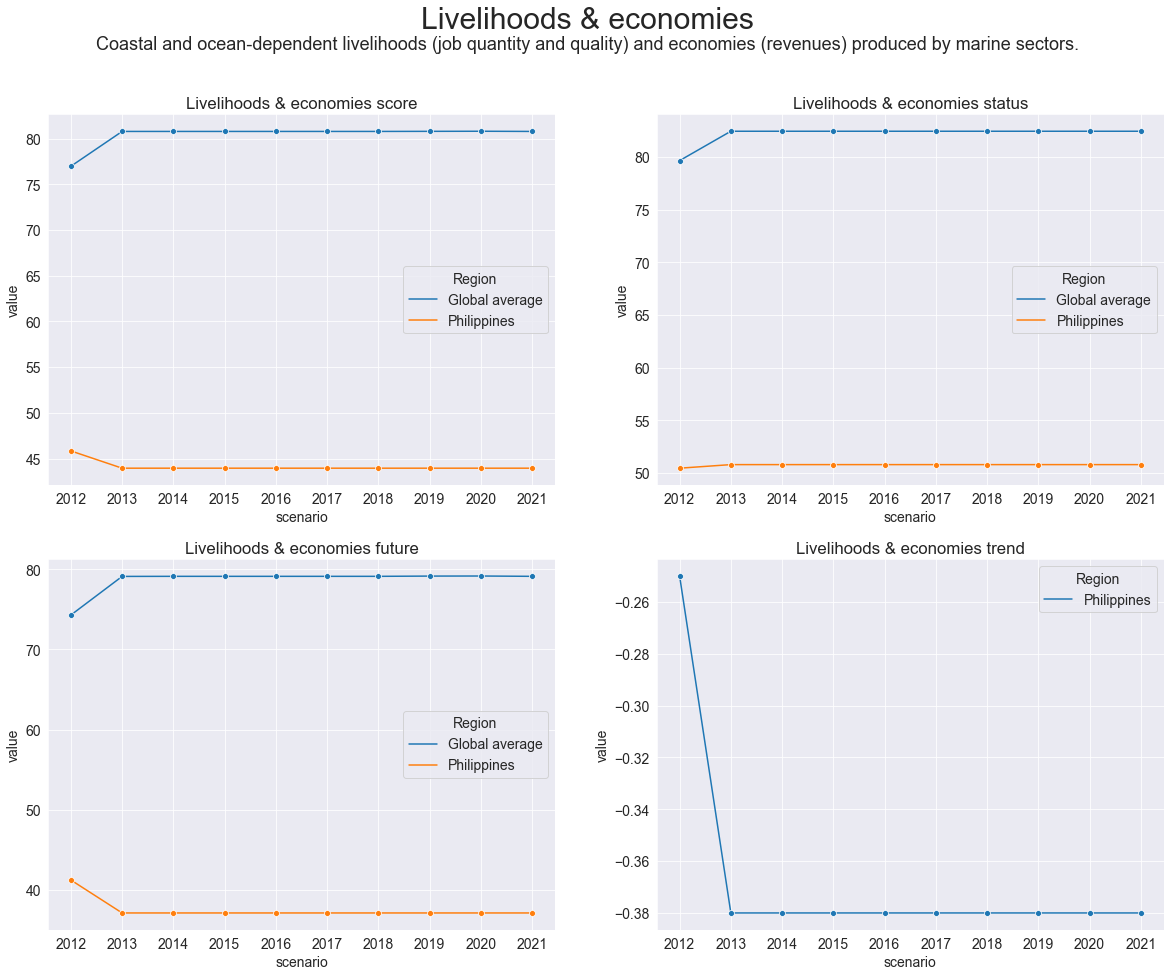

In [48]:
PHvsGlobalSubplot('LE')

We may also visualize the contribution of each subgoal below.

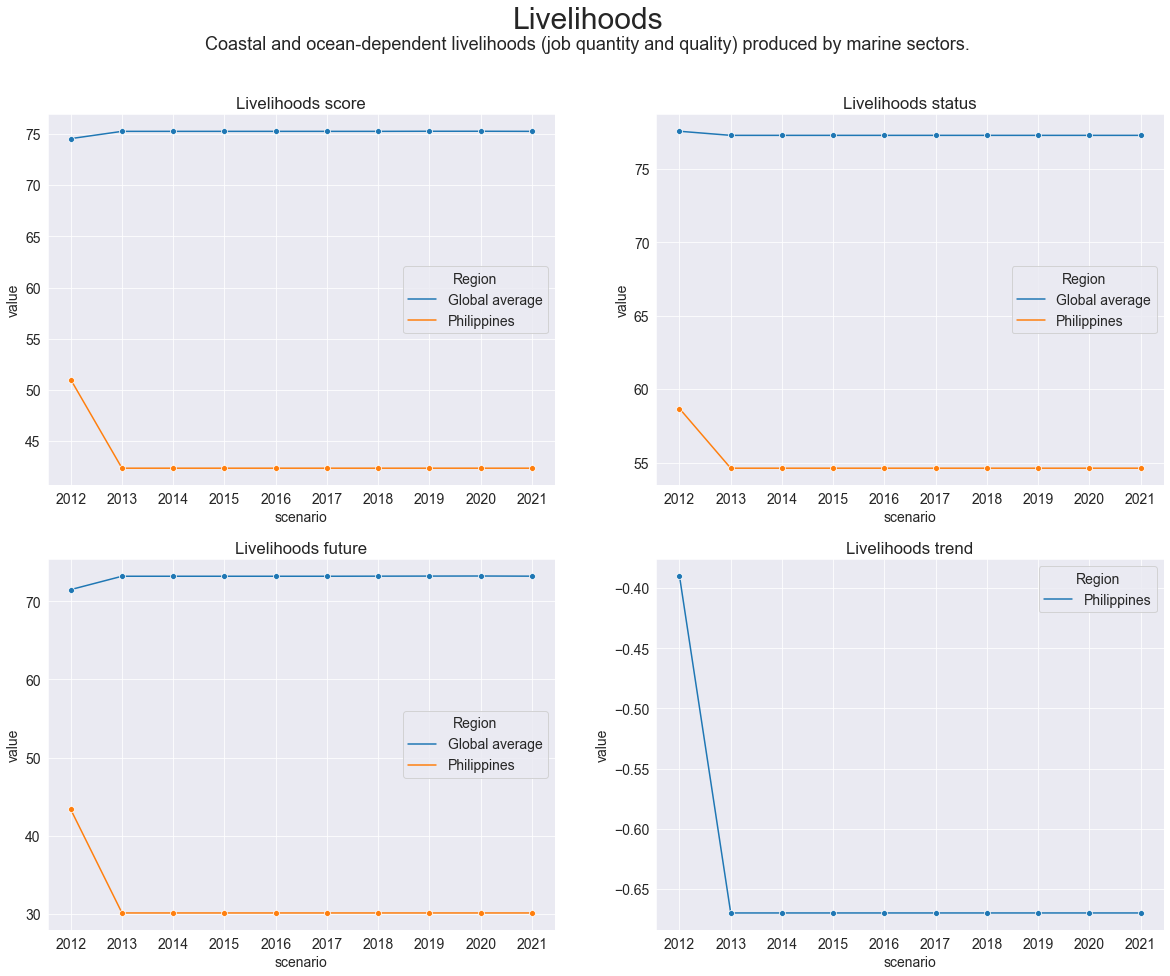

In [49]:
PHvsGlobalSubplot('LIV')

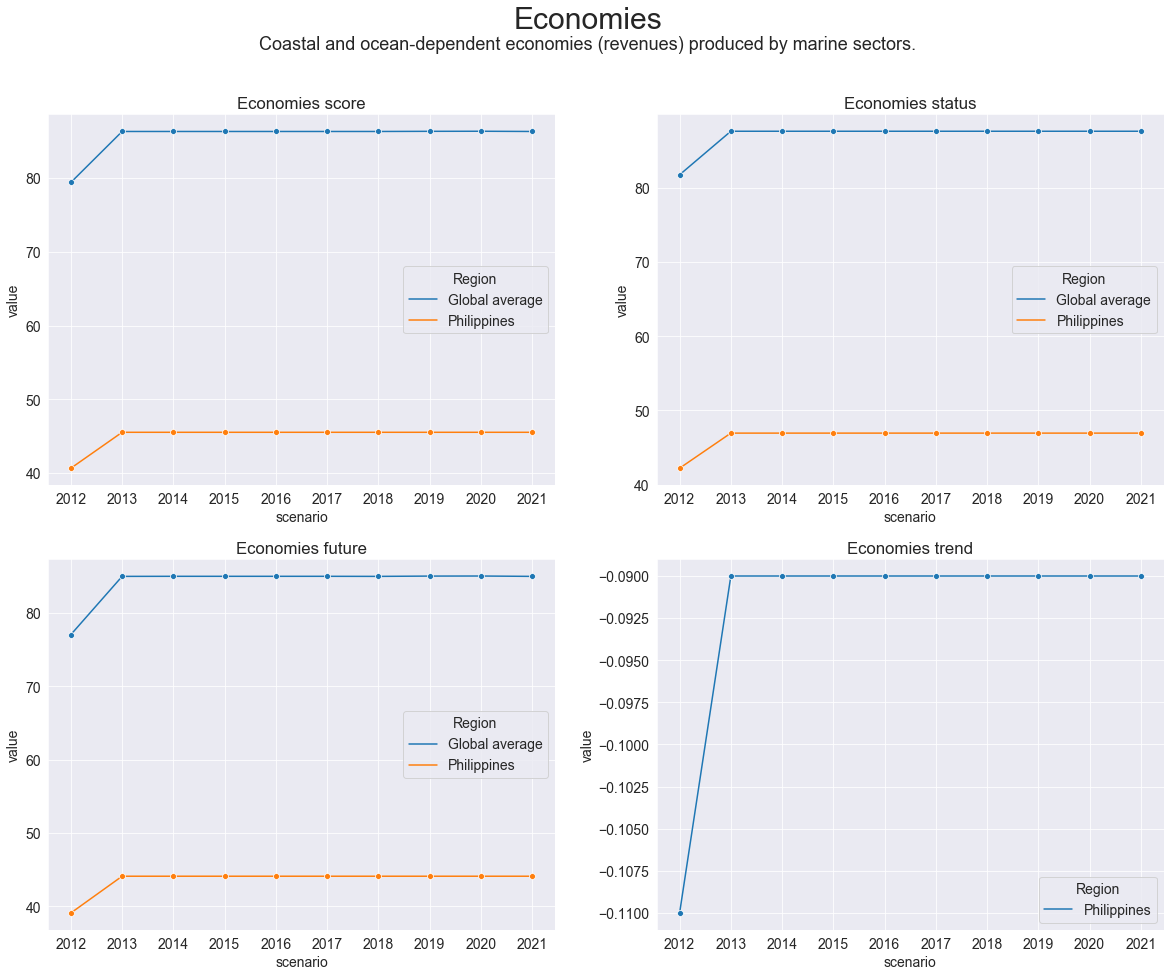

In [50]:
PHvsGlobalSubplot('ECO')

Unfortunately, from Section 6.7 of the [OHI methods documentation](http://htmlpreview.github.io/?https://github.com/OHI-Science/ohi-global/published/documents/methods/Supplement.html), the values for the Livelihood and Economies goal and its subgoals were no longer updated after 2013 due to lack of updates from source datasets. Thus, we will only be able to compare the status of Livelihoods and Fisheries from 2012-2013.

**The Philippines is 25 and 35 points below the global average (75) for Livelihoods and Economies in 2012 and 2013, respectively**, again, despite being a major sector of the Philippine economy. According to Section 6.7 of the [OHI methods documentation](http://htmlpreview.github.io/?https://github.com/OHI-Science/ohi-global/published/documents/methods/Supplement.html), the Livelihood scores are based on two factors: number of jobs and job quality, while the Economies score are based on a single factor: revenue. Thus, it is possible that the poor score of the Livelihoods can be a combination of both number of jobs and job quality, that is, **many workers in the marine sectors experience low per capita wages**. 

Indeed, according to the [Southeast Asian Fisheries Development Center (SEAFDEC)](http://www.seafdec.org/fisheries-country-profile-philippines/) in 2017, a total of 85% of the individuals in the fishing sector are from municipal fisheries, while only 1% come from commercial fisheries, and the rest come from aquaculture. Moreover, [BFAR](https://psa.gov.ph/content/fisheries-situation-report-january-december-2017-1) reported in the 2017 Fisheries Situation Report that the municipal sector contributed a similar volume of catch compared to the commercial sector; 1.13 million metric tons vs 0.947 million metric tons, respectively.

Similar catch yet wildly varying number of individuals per sector hints at a potentially uneven distribution of income from fish catch between commercial fisheries and municipal fisheries. In fact, a study by [Anticamara and Go](https://www.frontiersin.org/articles/10.3389/fmars.2016.00021/full) delineated that the incomes of municipal fishers are continually declining despite increasing fish value (hence, increasing revenue as visualized by the short increase between 2012-2013), which could either be an effect of lower catch rates, or possible exploitation from the commercial sector. Therefore, **there is a large imbalance between commercial and municipal fishing per capita incomes** in the Philippine fisheries sector, which could explain the low Livelihoods score relative to the global average.

To better understand the status of Filipino municipal fishers are with respect to the rest of the world, let us plot a line graph of the percentile rank of the Philippine's Livelihoods score.

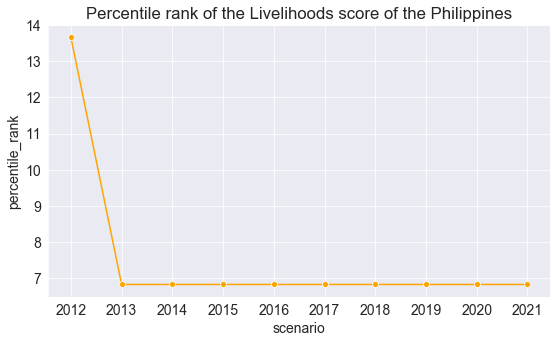

In [51]:
sns.lineplot(data=ohi_ph_df.loc[(ohi_ph_df['goal'] == 'LIV') & (ohi_ph_df['dimension'] == 'score')],
             x='scenario',
             y='percentile_rank',
             marker='o',
             color='orange');
plt.xticks(np.arange(2012,2022,1))
plt.title('Percentile rank of the Livelihoods score of the Philippines');

Indeed, the **Livelihoods score of the Philippines is at 14th percentile in 2012, and dropped to a depressing 7th percentile in 2013**. This is a very bad statistic especially that the Philippines is one of the most prominent countries in the global fishing industry. This truly puts into perspective the plight that our Filipino fisherfolk are experiencing. We could only speculate at the current scores for the Philippines if the data were available. However, it is unclear that any significant changes occurred in the past decade given how similar the apparent trends are with the present statistics. The Philippines would most likely still be at the bottom quartile. 

With the continued decrease of municipal fisherfolk incomes, decrease in total catch volume, and unsustainable practices such as illegal fishing and exploitation leading to depletion of key species and destruction of habitats, and not to mention the COVID-19 pandemic, there is a prime concern at the state of Livelihoods and Economy goal, as well as the previous related goal Food Provision, for the Philippines, which deserves to be given immediate attention by the government and the public. 

## Natural Products

![](https://www.ccacoalition.org/sites/default/files/styles/main_image/public/AdobeStock_76754726.jpeg?itok=XCy7MMSq)
*Photo from [Climate and Clean Air Coalition](https://www.ccacoalition.org/en/activity/supporting-enhanced-climate-ambition-and-action-indonesia)*

Aside from food, the ocean also hosts a staggering variety of inedible products and raw materials, ranging from fish by-products such as fish oil and fish meal, pharmaceuticals, and even mineral resources. Many advancements in biotechnology have been sourced from the seemingly endless variety of life within unexplored marine ecosystems. However, one does not need to be a marine scientist to benefit from sustainable natural products of the ocean; sustainable harvest and collection of marine species for ornamental purposes have also become a rising global industry, with the Philippines contributing its fair share among our country's vast variety of fish and marine plant species.

Let us visualize the influence of sustainable extraction of natural products in the Philippine oceans to the ocean's health.

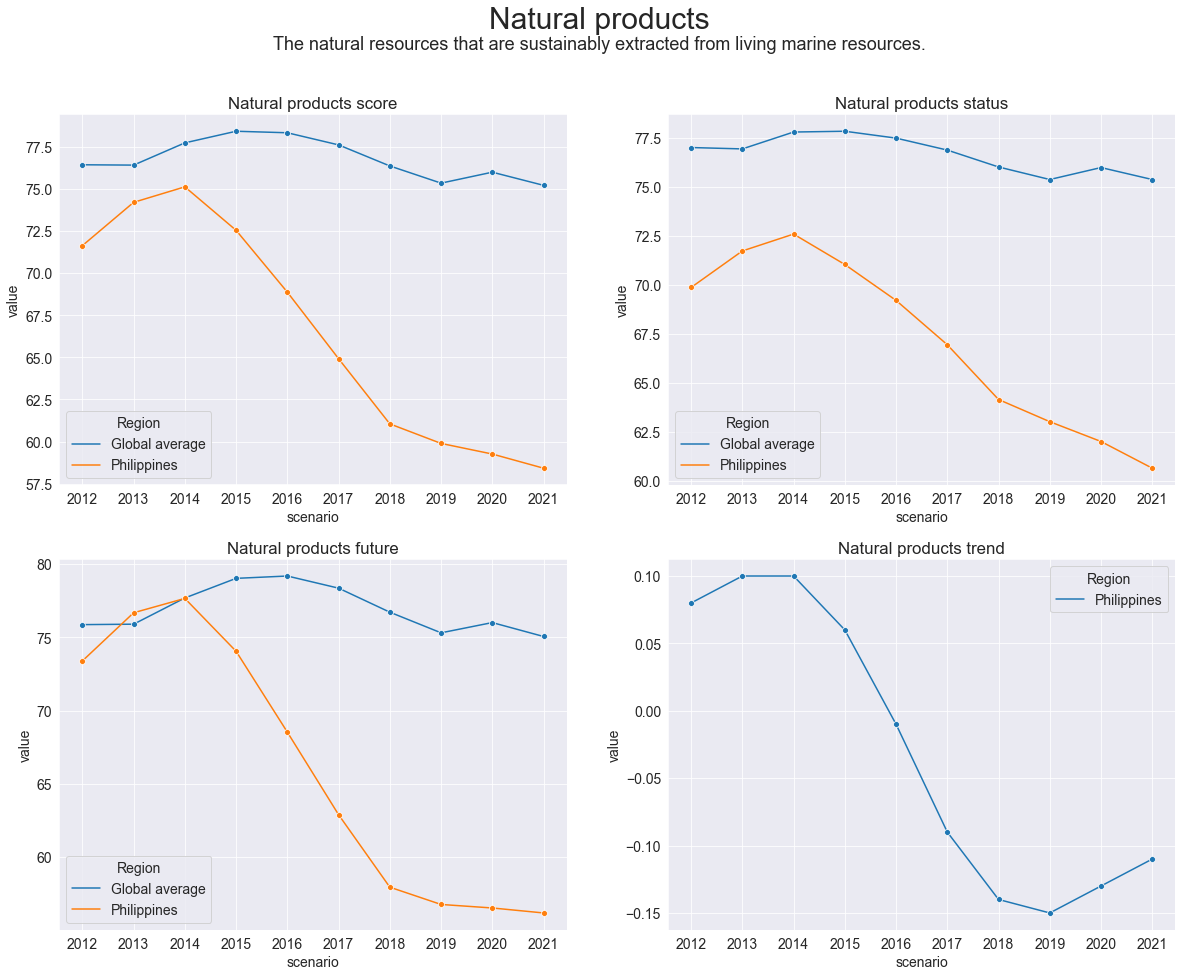

In [52]:
PHvsGlobalSubplot('NP')

According to the Section 6.8 of the [OHI methods documentation](http://htmlpreview.github.io/?https://github.com/OHI-Science/ohi-global/published/documents/methods/Supplement.html), the three natural product categories considered for this goal are: ornamental fish, fish oil and fish meat, and inedible seaweeds and marine plants. In the past assessments, the OHI database also included corals, shells, and sponges, however they excluded these categories for the most recent assessment due to a lack of evidence that carbonaceous species can be harvested sustainably, especially with concerns on carbon emissions and habitat destruction. Moreover, the dataset did not include nonrenewable resources such as oil, gas, and mineral resources, since these resources cannot be harvested sustainably by definition. The past scenarios were updated with these changes, and the resulting dimension values for the Natural Products goal are visualized above.

As with most product-related goals examined earlier, **the Philippines scored below the global average for Natural Products score for all assessment scenarios**. Moreover, **there has a rapidly decreasing trend starting from 2014 which slowed down in 2018**. The decreasing trend is also present in the global average scores, however, the trend for the Philippines is much steeper, which could be a sign that the decreasing trend is a result of both global and local factors, including climate change and introduction of invasive species to foreign marine ecosystems.

In the case of the Philippines, **the ornamental fish industry, though lucrative, is largely undeveloped yet overexploited**, according to [Muyot, et al.](http://www.nfrdi.da.gov.ph/tpjf/vol26_2/Status%20of%20Ornamental%20Fish%20Industry%20in%20the%20Philippines.'%20Prospects%20for%20Development.pdf). From their study, most of the ornamental fish capture procedures in the country involves wild capture, often through unsustainable practices such as overcapturing and using illegal methods such as cyanides for increased catch rates. This is in contrast to captive breeding and culture as done by most Asian countries involved in the global fish trade; a practice which is also generally undeveloped in the Philippines. As for the seaweed harvesting industry, [Tronco and Largo](https://www.degruyter.com/document/doi/10.1515/bot-2018-0069/html?lang=en) have cited a **steady decline in production volume of economically important seaweeds starting from 2011 to 2019**, citing improper culture practices leading to loss of genetic diversity. Furthermore, overharvesting of key seaweed species such as *Sargassum* have become an issue, which has led to a temporary nationwide ban in harvesting *Sargassum* seaweed species; a possible evidence of a lack of well-established policy frameworks for the proper management of the seaweed harvesting industry in the Philippines.

Therefore, the combination of these **unsustainable practices is the most likely reason for the rapid decrease of the Philippines' Natural Products score**. The trends are similar to the ones previously observed in Species Condition and Fisheries, which provides an evidence that the Philippines is, on average, struggling to achieve sustainable practices for its marine product sectors.

## Sense of Place: Iconic Species and Lasting Special Places

![](https://www.goodnewspilipinas.com/wp-content/uploads/2019/12/Tubbataha-1.jpg)
*Photo of Tubbataha Reef by [Simon Pierce, Facebook](https://www.goodnewspilipinas.com/tubbatahas-angelique-songco-honored-in-women-divers-hall-of-fame-2020-in-new-jersey/), via Good News Pilipinas*

Whether as a symbol of peace for or as a symbol of fear, there are countless cultural interpretations of the calm yet terrifying blue waters that span the entirety of our vast planet. As a culturally diverse archipelago with a rich maritime history, the Philippines is no stranger to the mystical side of breathtaking oceans and the mysterious species underneath its waves. The oceans provide a special connection to many people, whether personal or driven by their culture. The OHI recognizes this aspect of connection between ourselves and the oceans through the Sense of Place goal, which is divided to Iconic Species and Lasting Special Places; both of which are valued depending on their conservation status as a cultural symbol.

Let us visualize the influence of our cultural relationship with the ocean to the ocean's health.

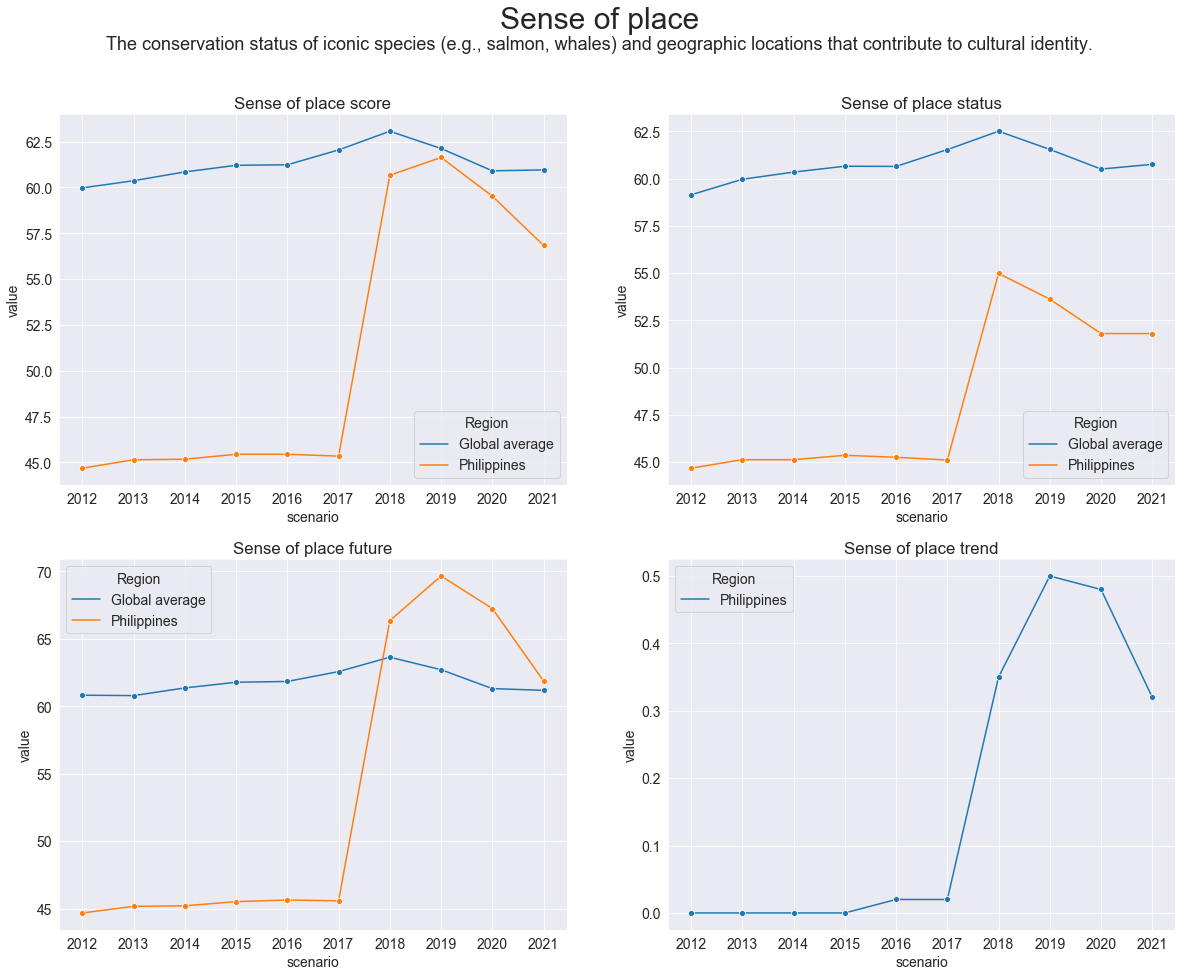

In [53]:
PHvsGlobalSubplot('SP')

The Philippines has scored below average for Sense of Place in every year. However, there seems to be a huge spike in 2018 which catapulted the Philippines' scores close to the global average. To investigate this observation, let us also plot the scores for both Iconic Species and Lasting Special Places subgoal.

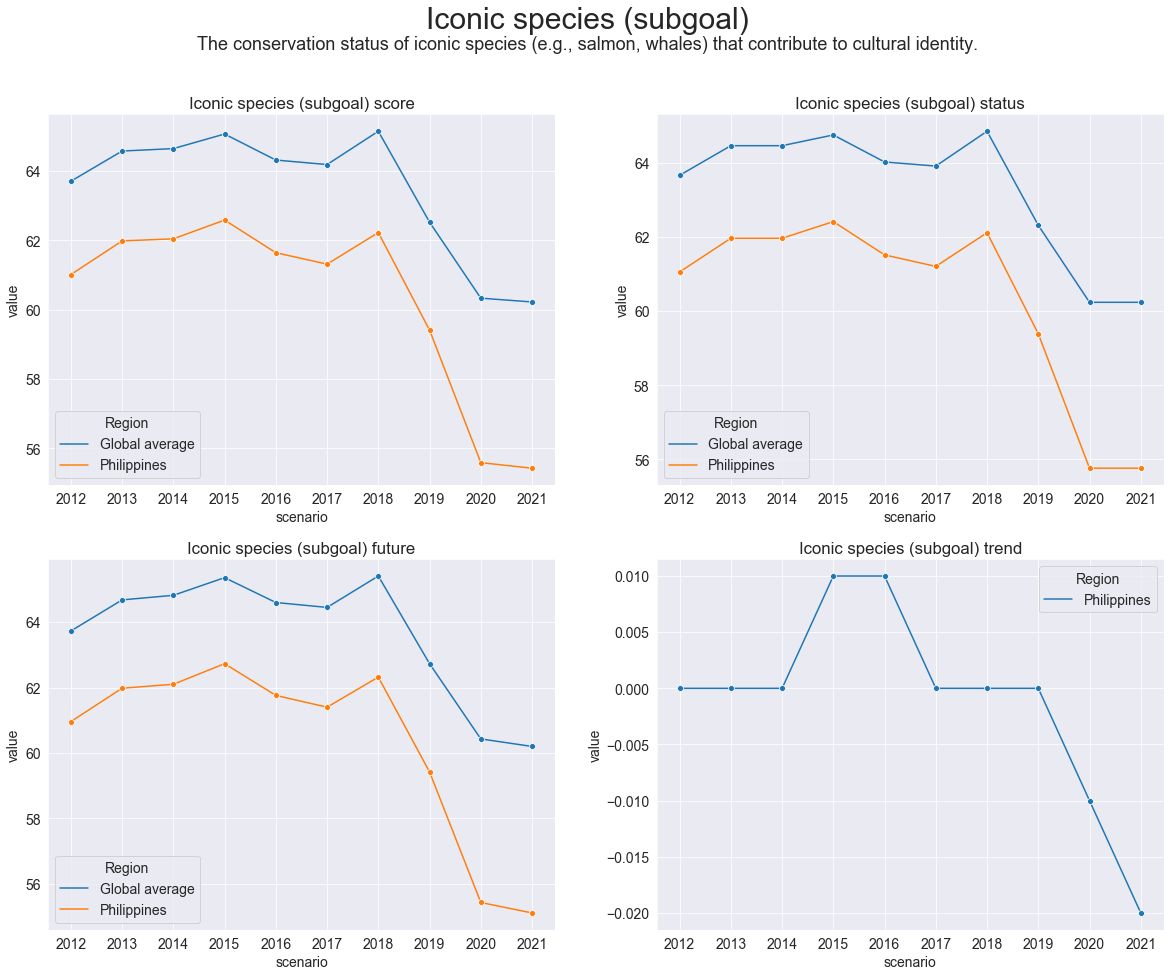

In [54]:
PHvsGlobalSubplot('ICO')

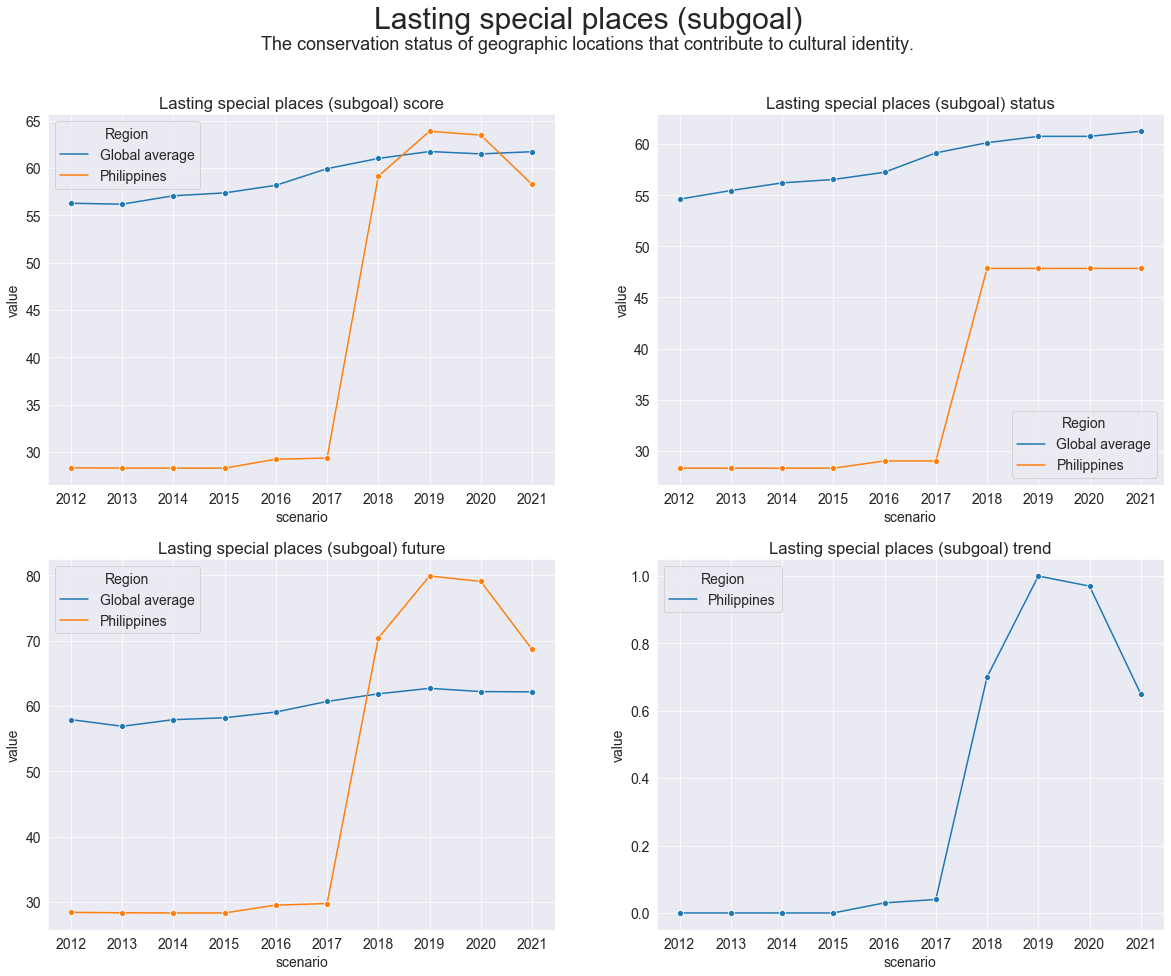

In [55]:
PHvsGlobalSubplot('LSP')

For Iconic Species, it seems that **the Philippines' score trends exactly the same way at all dimensions as the global average**, while the 2018 peak manifested as **a 2018 spike for Lasting Special Places**.

In Section 6.9 of the [OHI methods documentation](https://htmlpreview.github.io/?https://github.com/OHI-Science/ohi-global/published/documents/methods/Supplement.html#iucn_extinction_risk), it is recognized that **numerically evaluating the cultural impact of ocean places and species were difficult**, as there are practically an infinite ways in which a cultural connection could be described between a community and their coasts. As such, multiple assumptions and generalizations were made for calculating each subgoal.

For Iconic Species, the OHI dataset uses a list of species recognized by the [Worldwide Fund for Nature (WWF)](https://wwf.panda.org/discover/our_focus/wildlife_practice/flagship_keystone_indicator_definition/) as keystone, flagship, and priority. The conservation status of these species were used as weights for the Iconic Species score. If there is no data with regard to WWF-recognized keystone, flagship, and priority species, as with the case for the Philippines, then a general [global list](https://www.worldwildlife.org/species-categories/marine-animals/species/directory) was used to fill in the data for that region. Thus, **the Philippines does not have region-specific data for Iconic Species**, which explains the perfect trend with the global average. Moreover, it is possible that only a small number of regions with WWF-recognized species categories were considered in the dataset. Indeed, from the [data layer documentation](http://ohi-science.org/ohi-global/layers#iucn_extinction_risk), only Australia, Pakistan, India, Malaysia, Madagascar, Portugal, and Peru had region-specific Iconic Species values and weights. As a consequence, **due to lack of data, we cannot meaningfully extract insights on conservation of Philippines' iconic species**. This is unfortunate yet understandable, especially for a dataset as large as OHI. We cannot expect every dataset to contain impeccably accurate data, which is why many statistical methods are used to appropriately fill in the gaps of the real-world difficulties of data collection.

For Lasting Special Places, the OHI estimated the score by determining both a constant proportion of a region's inland and outland coastline and marine area and the area of protected coastlines and marine areas of that region, and the score is calculated based on a weighted sum of both quantities. Since the Philippines has a lengthy coastline and only a small proportion of it is considered a Marine Protected Area by Philippine law, it is likely that the estimate came out with a low score for the Philippines. Moreover, **the 2018 spike can be attributed to the [proclamation of the Benham Rise as a Marine Protected Area](https://news.abs-cbn.com/news/05/15/18/duterte-declares-benham-rise-a-marine-protected-area)**, which added a large enough offshore area to greatly increase the Lasting Special Places score. This change is evident in the Philippines' 2018 [data layer documentation for protected offshore areas](https://github.com/OHI-Science/ohi-global/blob/draft/eez/layers/lsp_prot_area_offshore3nm.csv), which is one of the four data layers utilized by the database to estimate the Lasting Special Places score.

Therefore, we may conclude that **there is not enough information in the current OHI database to accurately calculate the contribution of the cultural impact of the oceans in the Philippines to the ocean's health**. There were limited mother datasets for region-specific data, and the OHI researchers had to formulate statistical assumptions and generalizations to make up for missing data in regions such as the Philippines. To solve this issue, the Philippine government needs to coordinate with the WWF to formulate a list of keystone, flagship, and priority species of the Philippines. Moreover, data scientists for the OHI may need to coordinate with Filipino marine scientists in cataloguing the accurate extent of marine protected areas.

## Tourism and Recreation

![](https://www.ft.com/__origami/service/image/v2/images/raw/https%253A%252F%252Fs3-ap-northeast-1.amazonaws.com%252Fpsh-ex-ftnikkei-3937bb4%252Fimages%252F5%252F8%252F2%252F5%252F16905285-1-eng-GB%252FRTX6GM8W.jpg?width=1024&height=512&fit=cover&gravity=faces&source=nar-cms)
*Photo of Boracay from [Reuters](https://asia.nikkei.com/Editor-s-Picks/Tea-Leaves/Boracay-s-cautionary-tale-for-region-s-scenic-cashcows), via Nikkei Asia*

Whether through enjoying the beach during a vacation or taking amazing photographs of the ocean landscape and its underwater environment, the oceans are a popular site for enjoyment and relaxation. For the Philippines, the oceans represent a significant part of Philippine international and local tourism, so much that popular destinations such as Palawan and Boracay became a Filipino icon to foreign and local travelers alike. Aside from beaches, the Philippines also welcomes tourists to explore rich marine ecosystems, see iconic whales, turtles, and sharks in action, or just enjoy the atmosphere of living near beautiful coasts through hotels and resorts.

Let us visualize the social impact of tourism and recreation to the health of Philippine oceans.

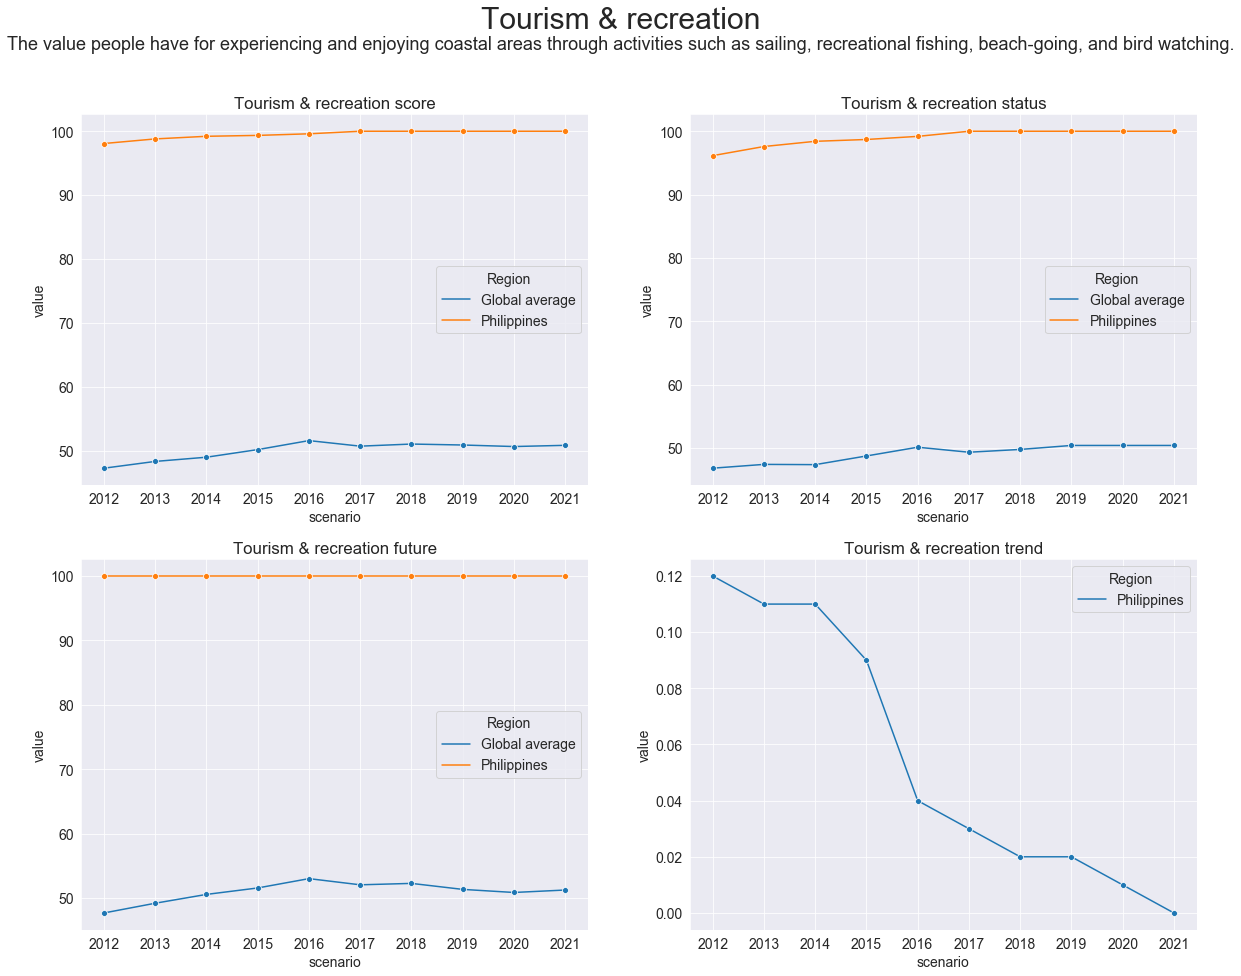

In [56]:
PHvsGlobalSubplot('TR')

According to Section 6.10 of the [OHI methods documentation](https://htmlpreview.github.io/?https://github.com/OHI-Science/ohi-global/published/documents/methods/Supplement.html#iucn_extinction_risk), the economic impact of tourism was already included in the previous goals. The two main factors included for calculation of the goal are number of employment involved directly in the industry, as well as a comprehensive sustainability index determined from the World Economic Forum’s Travel Tourism Competitiveness indices, which covers infrastructure, resources, travel and tourism policies, and environment.

**The Philippines held an almost perfect to a perfect 100 score in Tourism and Recreation for all years**, 50 points above the global average. Above the 10 goals previously examined, this goal is the most successful for the Philippines. However, **the decreasing trend suggests that there is potential for the score to drop in the future**, especially as the COVID-19 pandemic has suspended foreign travel during certain periods which crippled the tourism industry in the past few years. 

Nevertheless, the remarkable Tourism and Recreation score of the Philippines suggests that **tourism has the most positive overall impact to the Philippine oceans**, as compared to the other goals. Even then, we need to be careful that success in the tourism industry must not be a factor for the decrease in the health of the oceans in terms of the other goals, especially for Biodiversity. The Philippines being a world-class destination for ocean tourism suggests and inspires that our country still has the potential to better sustain and conserve our marine ecosystems and resources for the future.

# Summary

The OHI database provides a comprehensive overview of the ocean health of a region in terms of its physical, biological, and socioeconomic status. To achieve this task, ten goals were implemented in the dataset and the influence of each goal to the ocean health is determined by several dimensions. 

In the 2021 assessment scenario, the Philippines achieved an overall index score of 63.31, which is below the global average score of 70.22 and placed the Philippines at a poor 17th percentile rank among 220 regions. Moreover, the Philippines has been below the global average for all assessment scenarios since 2012. A decreasing trend was observed for Philippines' overall index score over time which has worsened in the recent years; inciting an alarming sign that the Philippines' ocean health is at a fast decline.

The goals wherein the Philippines scored poorly compared to the global average are Clean Waters, Livelihood and Economy, Biodiversity, Natural Products, Food Provision, and Artisanal Opportunities. The Artisanal Opportunities goal had high scores for the Philippines before 2020 but then plummeted to a very low score after 2020. The trend represented the struggles of the small-scale fishing sector in the Philippines during the COVID-19 pandemic. Low scores for Livelihood and Economy were speculated to be caused by poor job security and uneven per capita income between the commercial and municipal fishing sectors in the Philippines. Similar decreasing trends were observed in Clean Waters, Biodiversity, Natural Products, and Food Provision, which potentially implies that although the Philippines has rich marine resources, the methods for catching and harvesting resources are exploitative and unsustainable which is continuing to damage the health of the Philippine oceans in the long term. 

In spite of the low scores for the above majority of goals, there are still two goals wherein the Philippines scored highly above the global average: Coastal Protection and Tourism, of which the latter goal netted near-perfect scores. Furthermore, increasing trends were observed in some subgoals, such as the continual increase in the scores of Mariculture subgoal in contrast to decreasing trends in the Fisheries subgoal, both under the Food Provision goal.

Lastly, two goals were deduced to be unrepresentative in the case of the Philippines: Carbon Storage and Sense of Place. For Carbon Storage, there is lack of data which properly maps the saltmarsh covers of the Philippines. As for Sense of Place, the methods used for computing the scores for the Philippines were generalized due to lack of region-specific data for WWF recognized iconic, flagship, and priority species, as well as a lack of region-specific methods for measuring the true extent of recognized Marine Protected Areas.

# Conclusion and Recommendations

Data analysis is an important tool to help us understand and explain phenomena scientifically using a compilation of variables and values collected from multiple sources of data. In this exploratory data analysis, preliminary data analysis methods were performed using the Python programming language to the OHI database, with an aim to gather insights on the state of the Philippine oceans relative to the rest of the world. Overall, it was shown that the health of the Philippine oceans is currently in a rapid decline, implied to be caused by failure to promote sustainability to preserve and protect the natural wealth of Philippine marine resources and marine and coastal ecosystems.

For future data analysis exploratory projects using the OHI dataset, it is recommended to:

- explore trends of each data layer for each individual goal and subgoal
- incorporate individual variables for pressures and resilience dimensions to the analysis
- change or widen the scope to incorporate Southeast Asian nations, European nations, African nations, and other possible perspectives

This exploratory data analysis project can help in setting a starting point for future data analysis projects focused at the improvement of specific goals. For future data modelling applications using the OHI dataset, it is recommended to:

- implement learning models utilizing each individual data layer to determine how a specific goal can be best improved for the Philippines as well as the global average 
- compare and contrast improvements and failures of a set of regions and model these changes for other regions

# References

- Anticamara, J. A., &amp; Go, K. T. B. (2016, January 1). Spatio-temporal declines in Philippine fisheries and its implications to Coastal Municipal Fishers' catch and income. Frontiers. Retrieved from https://www.frontiersin.org/articles/10.3389/fmars.2016.00021/full 
- BFAR (2014). PHILIPPINE CORAL REEFS. Retrieved from https://www.bfar.da.gov.ph/habitat.jsp?id=4 
- BFAR (2015). Fisheries Situation Report. https://www.bfar.da.gov.ph/files/img/photos/2015FisheriesProfile(Final).pdf
- BFAR (2020). Fisheries Situation Report https://beta.bfar.da.gov.ph/wp-content/uploads/2021/04/BFAR-ANNUAL-NARRATIVE-REPORT.pdf
- Central Intelligence Agency. (2022). Philippines. Central Intelligence Agency. Retrieved from https://www.cia.gov/the-world-factbook/countries/philippines/ 
- Cervantes, F. M. (2021, July 28). House passes Bill Banning single-use plastics. Philippine News Agency. Retrieved from https://www.pna.gov.ph/articles/1148600 
- Courtney, C., Jhaveri, N., &amp; Brooks, S. (2018, March 26). Marine tenure and small-scale fisheries: Learning from the Philippines experience. LandLinks. Retrieved from https://www.land-links.org/research-publication/marine-tenure-and-small-scale-fisheries-learning-from-the-philippines-experience/ 
- Department of Environment and Natural Resources. 2013. Sustaining our Coasts: The Ridge-to-Reef Approach: A Compilation of Technical and Policy Papers: National Integrated Coastal Management Program (NICMP).Integrated Coastal Resources Management Project (ICRMP) of the Department of Environment and NaturalResources, Quezon City, Philippines, 36 p.
- DENR. (2016). MANAGEMENT OF COASTAL AND MARINE RESOURCES/AREA. Biodiversity Management Bureau. Retrieved from https://bmb.gov.ph/index.php/major-programs-cmemp/cmemp 
- GDRC. (n.d.). Oceans and the carbon cycle. Ocean on-pagers: Do we know enough of Oceans? Retrieved from https://www.gdrc.org/oceans/fsheet-02.html 
- Giz. (2022). Protecting coastal areas vulnerable to typhoons against the impacts of climate change. Startseite. Retrieved from https://www.giz.de/en/worldwide/74611.html 
- Kinsey, D. W., &amp; Hopley, D. (2003, April 9). The significance of coral reefs as global carbon sinks- response to greenhouse. Global and Planetary Change. Retrieved from https://www.sciencedirect.com/science/article/abs/pii/092181819190117F 
- Lamarca, N. S. J. (2017). Fisheries country profile: Philippines. SEAFDEC. Retrieved from http://www.seafdec.org/fisheries-country-profile-philippines/ 
- Macusi, E. D., Rafon, J. K. A., &amp; Macusi, E. S. (2021, December 9). Impact of covid-19 and closed fishing season on commercial fishers of Davao Gulf, Mindanao, Philippines. Ocean &amp; Coastal Management. Retrieved from https://www.sciencedirect.com/science/article/pii/S0964569121004804 
- Muyot, F., Mutia, M. T., Manejar, A. J., Guirhem, G., &amp; Muñez, M. (2019). Status of ornamental fish industry in the Philippines: Prospects for Development. The Philippine Journal of Fisheries, 26(2), 82–97. https://doi.org/10.31398/tpjf/26.2.2019a0011 
- Oceana. (2016, June 6). Diverse Marine Life recorded in 2016 Benham Rise Expedition. Oceana. Retrieved from https://oceana.org/blog/diverse-marine-life-recorded-2016-benham-rise-expedition/ 
- Ocean Health Index. 2021. ohi-global version: Global scenarios data for Ocean Health Index, December 30, 2021. National Center for Ecological Analysis and Synthesis, University of California, Santa Barbara. Available at: https://github.com/OHI-Science/ohi-global/releases
- Ocean Health Index. 2021. ohiprep version: Preparation of data for global scenarios of the Ocean Health Index, December 30, 2021. National Center for Ecological Analysis and Synthesis, University of California, Santa Barbara. Available at: https://github.com/OHI-Science/ohiprep/releases
- Ocean Health Index. (2021). File: lsp_prot_area_offshore3nm.csv. GitHub. Retrieved from https://github.com/OHI-Science/ohi-global/blob/draft/eez/layers/lsp_prot_area_offshore3nm.csv 
- Ocean Health Index (2021). Ohi Methods and Documentation. Retrieved from http://htmlpreview.github.io/?https://github.com/OHI-Science/ohi-global/published/documents/methods/Supplement.html
- Philippines. SEA circular. (2020, October 27). Retrieved from https://www.sea-circular.org/country/philippines/#:~:text=The%20Philippines%20is%20one%20of 
- Placido, D. (2018, May 18). Duterte declares Benham Rise a marine protected area. ABS-CBN News. Retrieved from https://news.abs-cbn.com/news/05/15/18/duterte-declares-benham-rise-a-marine-protected-area 
- Salayo, N. D., Perez, M. L., Garces, L. R., &amp; Pido, M. D. (1970, January 1). Mariculture development and livelihood diversification in the Philippines. SEAFDEC/AQD Institutional Repository. Retrieved from https://repository.seafdec.org.ph/handle/10862/1599 
- Tantuco, V. (2021, December 7). In numbers: The Philippines' fisheries sector. RAPPLER. Retrieved from https://www.rappler.com/environment/philippines-fisheries-sector-statistics/ 
- Tetratech. (n.d.). Philippines coastal resource management. Tetra Tech. Retrieved from https://www.tetratech.com/en/projects/philippines-coastal-resource-management 
- Trono, G. C., &amp; Largo, D. B. (2019, October 1). The seaweed resources of the Philippines. De Gruyter. Retrieved from https://www.degruyter.com/document/doi/10.1515/bot-2018-0069/html?lang=en 
- UN-WCMC. (2022). Ocean Data viewer. Ocean Data Viewer. Retrieved from https://data.unep-wcmc.org/ 
- WEPA. (2003). State of water environmental issues - Philippines. WEPA. Retrieved from http://www.wepa-db.net/policies/state/philippines/overview.htm 
- WWF. (n.d.). Global species programe: How WWF classifies species. WWF. Retrieved from https://wwf.panda.org/discover/our_focus/wildlife_practice/flagship_keystone_indicator_definition/ 
- WWF. (n.d.). Species list. WWF. Retrieved from https://www.worldwildlife.org/species-categories/marine-animals/species/directory 

![](https://i.imgur.com/GNTXT09.jpg?1)
*Palani Beach, Balud, Masbate. Photo by LC Cedino*